# MLP simples

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Datasets = []
PREDICTORS = ["PwmD", "PwmE"]   
TARGET = ["Wd", "We"]       
TIME_STEPS = 3

for i in range(3):   
    Dataset = pd.read_csv(f"../Dados/Data{i + 1}.csv")
        
    # Ajusta índice pelo tempo
    Dataset.index = (np.arange(0, len(Dataset), 1).astype(float) * 0.07).round(5)
    
    Datasets.append(Dataset)
    
    print(f"++++++++++++++++++++ Dataset {i+1} +++++++++++++++++++++++")
    print(Dataset.head(5))


++++++++++++++++++++ Dataset 1 +++++++++++++++++++++++
        X    Y  Theta   Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.0  0.0  -0.00   0.00  -0.00   0.00
0.07  0.0  0.7    0.0  0.0  0.0   2.96   2.96  -0.00   0.00
0.14  0.0  0.7    0.0  0.0  0.0   2.96   2.96  44.36  44.36
0.21  0.0  0.7    0.0  0.0  0.0   2.96   2.96  44.36  44.36
0.28  0.0  0.7    0.0  0.0  0.0   2.96   2.96  62.10  62.10
++++++++++++++++++++ Dataset 2 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.00  0.0  -0.00   0.00  -0.00   0.00
0.07  0.0  0.7    0.0  0.00  0.0   3.02   3.02  -0.00   0.00
0.14  0.0  0.7    0.0  0.00  0.0   3.02   3.02  45.32  45.32
0.21  0.0  0.7    0.0  0.03  0.0   3.02   3.02  45.32  45.32
0.28  0.0  0.7    0.0  0.00  0.0   3.02   3.02  63.00  63.44
++++++++++++++++++++ Dataset 3 +++++++++++++++++++++++
        X    Y  Theta    Wd    We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.00  0.00  -0.00   0.00

In [2]:
NormDatasets = []

SCALER = StandardScaler()
OUT_SCALER = StandardScaler()

TrainDataset = Datasets[0]
TrainDataset[PREDICTORS] = SCALER.fit_transform(TrainDataset[PREDICTORS])
TrainDataset[TARGET] = OUT_SCALER.fit_transform(TrainDataset[TARGET])
NormDatasets.append(TrainDataset)

for i in range(2):
      CurrentTestDataset = Datasets[i + 1]
      CurrentTestDataset[PREDICTORS] = SCALER.transform(CurrentTestDataset[PREDICTORS])
      CurrentTestDataset[TARGET] = OUT_SCALER.transform(CurrentTestDataset[TARGET])
      NormDatasets.append(CurrentTestDataset)
      print(f"++++++++++++++++++++ Dataset Normalizado {i+1} +++++++++++++++++++++++")
      print(NormDatasets[i].head(5))

++++++++++++++++++++ Dataset Normalizado 1 +++++++++++++++++++++++
        X    Y  Theta        Wd        We  WdRef  WeRef      PwmD      PwmE
0.00  0.0  0.7    0.0  0.106146  0.084794  -0.00   0.00  0.157367  0.128252
0.07  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.157367  0.128252
0.14  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.696666  0.601998
0.21  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.696666  0.601998
0.28  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.912337  0.791454
++++++++++++++++++++ Dataset Normalizado 2 +++++++++++++++++++++++
        X    Y  Theta        Wd        We  WdRef  WeRef      PwmD      PwmE
0.00  0.0  0.7    0.0  0.106146  0.084794  -0.00   0.00  0.157367  0.128252
0.07  0.0  0.7    0.0  0.106146  0.084794   3.02   3.02  0.157367  0.128252
0.14  0.0  0.7    0.0  0.106146  0.084794   3.02   3.02  0.708337  0.612251
0.21  0.0  0.7    0.0  0.117743  0.084794   3.02   3.02  0.708337  0.612251
0.28  0.0  0.7    0.0  0.10614

In [3]:
def CreateSequences(input_data, target_data, timesteps):
    X_seq, Y_seq = [], []
    
    for i in range(timesteps, len(input_data)):
        X_seq.append(input_data.iloc[i-timesteps:i].values)
        Y_seq.append(target_data.iloc[i])
    return np.array(X_seq), np.array(Y_seq)

In [4]:
x_train = TrainDataset[PREDICTORS]
y_train = TrainDataset[TARGET]

x_train, y_train = CreateSequences(x_train, y_train, TIME_STEPS)

x_val = (NormDatasets[1])[PREDICTORS]
y_val = (NormDatasets[1])[TARGET]

x_val, y_val = CreateSequences(x_val, y_val, TIME_STEPS)


print(f"Dimensão da entrada: {np.shape(x_train)}")
print(f"Dimensão da saida: {np.shape(y_train)}")

Dimensão da entrada: (803, 3, 2)
Dimensão da saida: (803, 2)


In [5]:
import matplotlib.pyplot as plt

def PlotHistory(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training History')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

TITLES = ["train", "val", "test"]

def PlotOut(ax, title, target_name, y_true, y_pred):
    time = (np.arange(0, len(y_pred), 1).astype(float) * 0.07).round(5)

    ax.scatter(time, y_true, marker='o', s=12, label='Amostras Reais', alpha=0.7)
    ax.scatter(time, y_pred, marker='x', s=12, label='Valores Preditos', alpha=0.7)
    ax.set_title(f'{title} - {target_name}')
    ax.set_xlabel('Tempo [s]')
    ax.set_ylabel(target_name)
    ax.legend()
    ax.grid(True)


def EvalModel(model):
    n_datasets = len(Datasets)
    n_targets = len(TARGET)
    fig, axs = plt.subplots(n_datasets, n_targets, figsize=(6 * n_targets, 4 * n_datasets))
    
    metrics = {name: {"R2_train": [], "R2_test": [], "R2_val": [],
                      "MSE_train": [], "MSE_test": [], "MSE_val": [],} for name in TARGET}

    for i, dataset in enumerate(NormDatasets):
        x = dataset[PREDICTORS]
        y = dataset[TARGET]
        x, y = CreateSequences(x, y, TIME_STEPS)

        y_pred = OUT_SCALER.inverse_transform(model.predict(x))
        y_true = OUT_SCALER.inverse_transform(y)

        # Calcula métricas por saída
        for j, name in enumerate(TARGET):
            r2 = r2_score(y_true[:, j], y_pred[:, j])
            mse = mean_squared_error(y_true[:, j], y_pred[:, j])
            metrics[name][f"R2_{TITLES[i]}"].append(r2)
            metrics[name][f"MSE_{TITLES[i]}"].append(mse)

            print(f"{name} | {TITLES[i]} -> R² = {r2:.4f}, MSE = {mse:.4e}")
            
            # Seleciona o eixo correto (funciona mesmo com 1x1, 1x2 ou 3x2)
            ax = axs[i][j] if n_datasets > 1 and n_targets > 1 else (
                axs[j] if n_targets > 1 else axs[i] if n_datasets > 1 else axs
            )
            PlotOut(ax, TITLES[i], name, y_true[:, j], y_pred[:, j])

    plt.tight_layout()
    plt.show()

    # Retorna métricas médias para análise posterior
    return metrics

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Wd | train -> R² = 0.9279, MSE = 4.8419e-01
We | train -> R² = 0.9326, MSE = 4.4875e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Wd | val -> R² = 0.9485, MSE = 3.5323e-01
We | val -> R² = 0.9283, MSE = 5.0206e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.8834, MSE = 7.1995e-01
We | test -> R² = 0.8579, MSE = 8.9883e-01


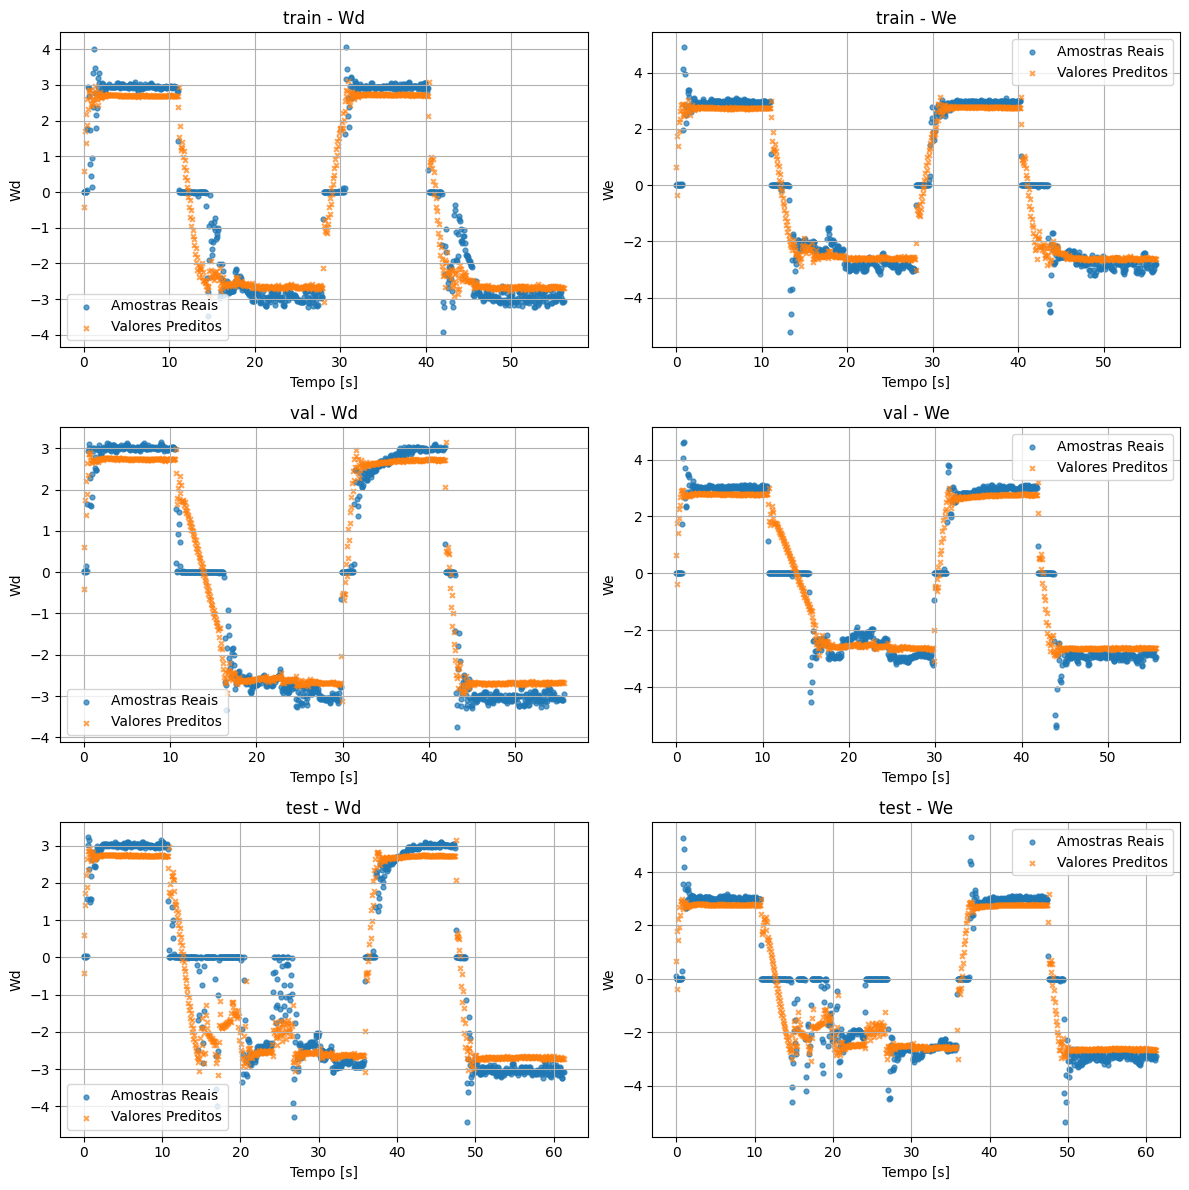

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Wd | train -> R² = 0.9300, MSE = 4.7029e-01
We | train -> R² = 0.9341, MSE = 4.3922e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9497, MSE = 3.4541e-01
We | val -> R² = 0.9290, MSE = 4.9714e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.8878, MSE = 6.9254e-01
We | test -> R² = 0.8618, MSE = 8.7388e-01


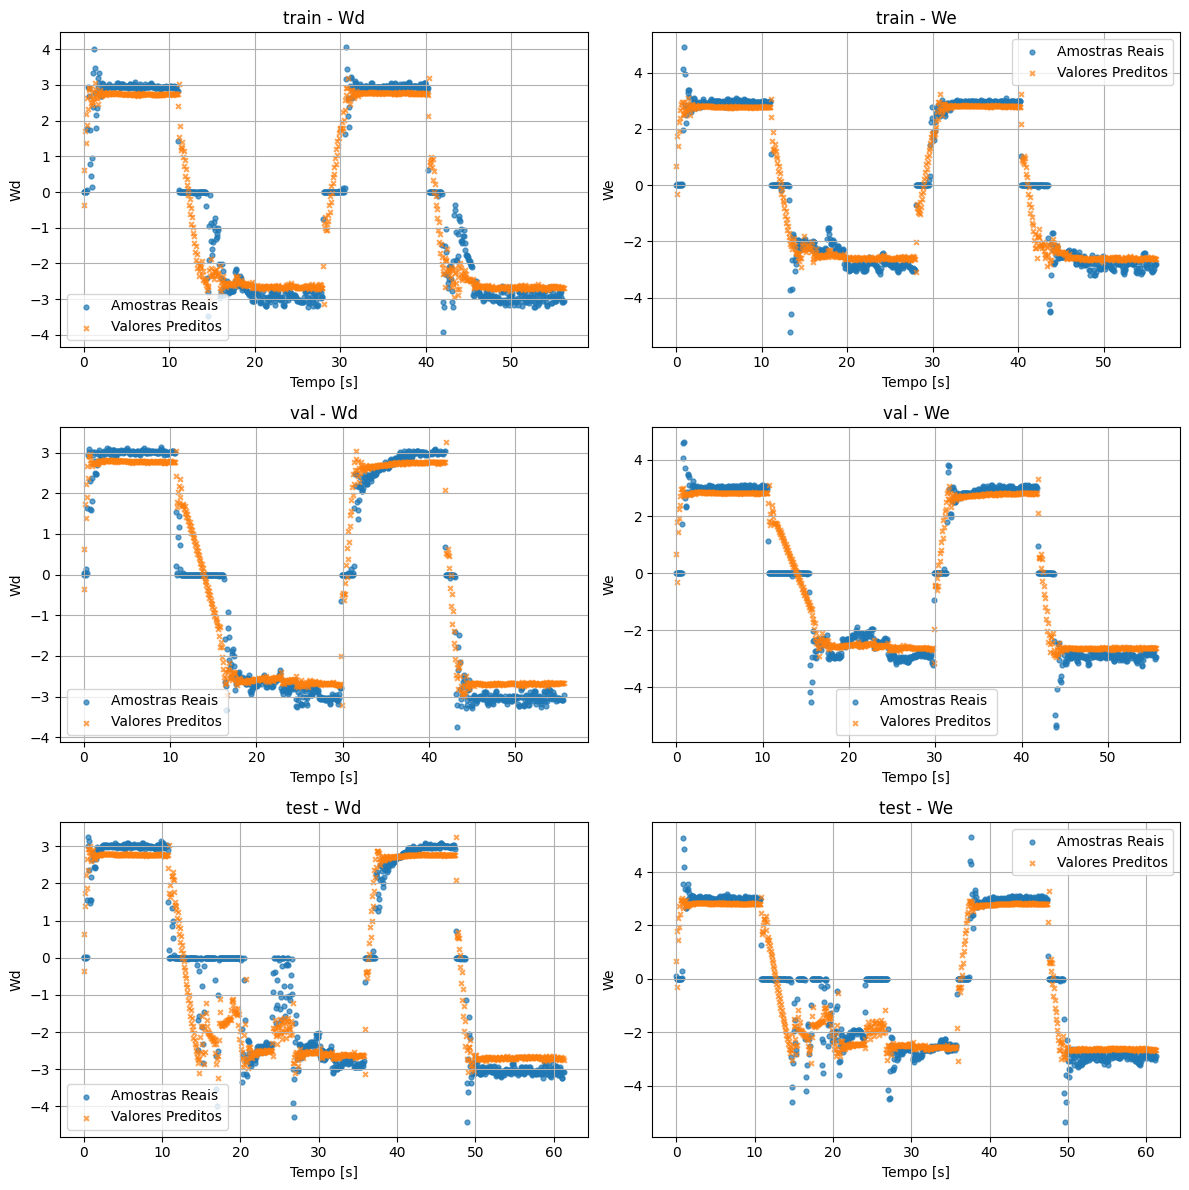

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Wd | train -> R² = 0.9328, MSE = 4.5146e-01
We | train -> R² = 0.9343, MSE = 4.3769e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9496, MSE = 3.4583e-01
We | val -> R² = 0.9262, MSE = 5.1681e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.8948, MSE = 6.4946e-01
We | test -> R² = 0.8569, MSE = 9.0472e-01


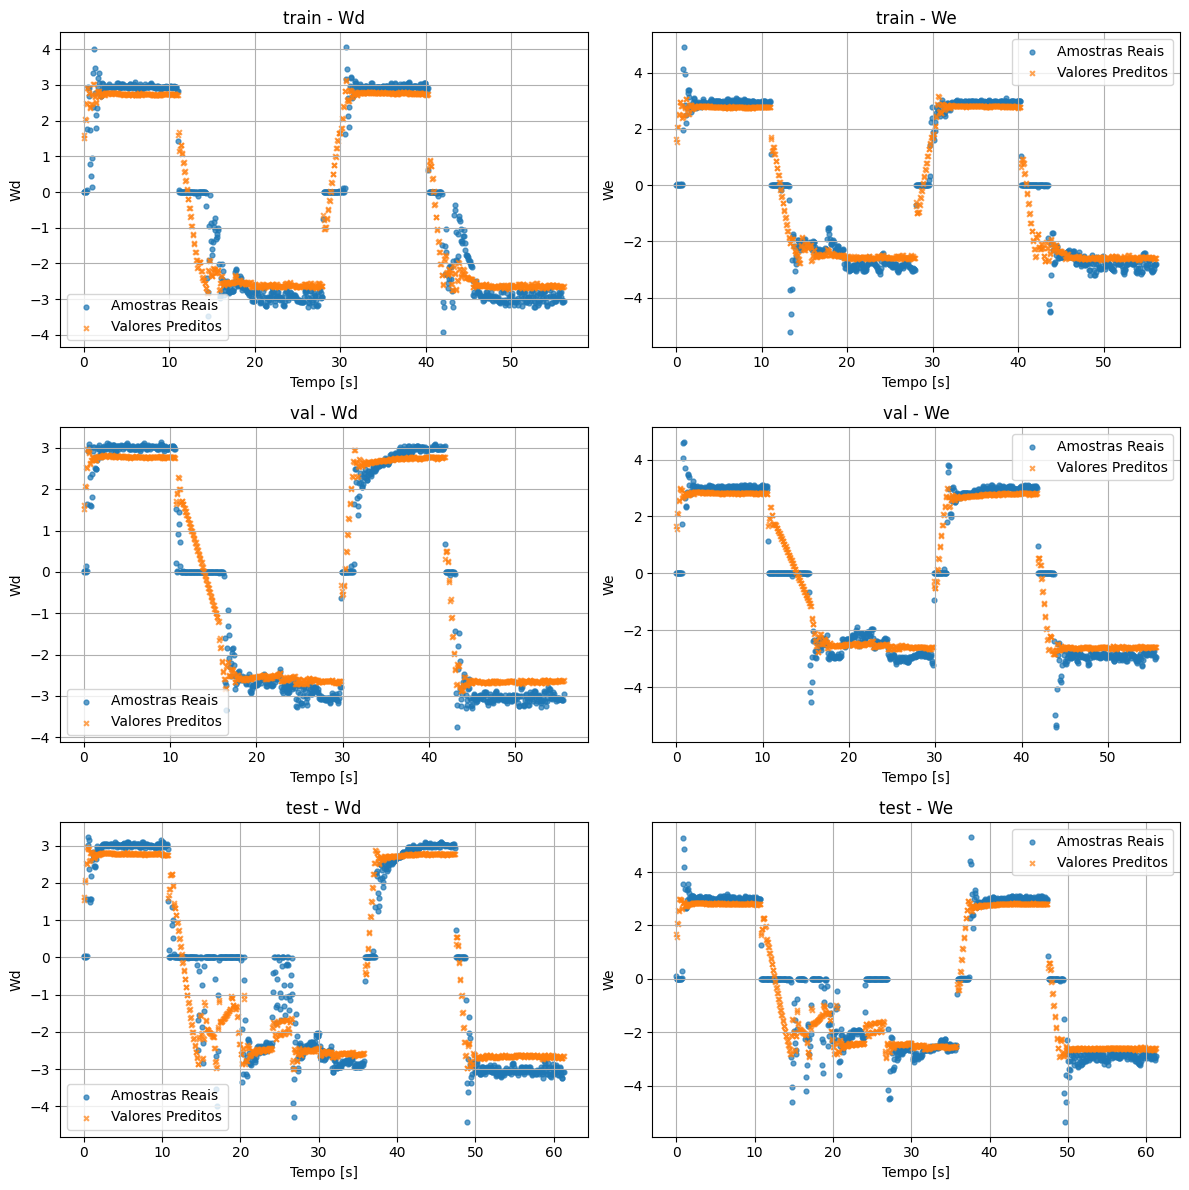

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Wd | train -> R² = 0.9319, MSE = 4.5711e-01
We | train -> R² = 0.9333, MSE = 4.4420e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9491, MSE = 3.4907e-01
We | val -> R² = 0.9247, MSE = 5.2700e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.8931, MSE = 6.6010e-01
We | test -> R² = 0.8560, MSE = 9.1055e-01


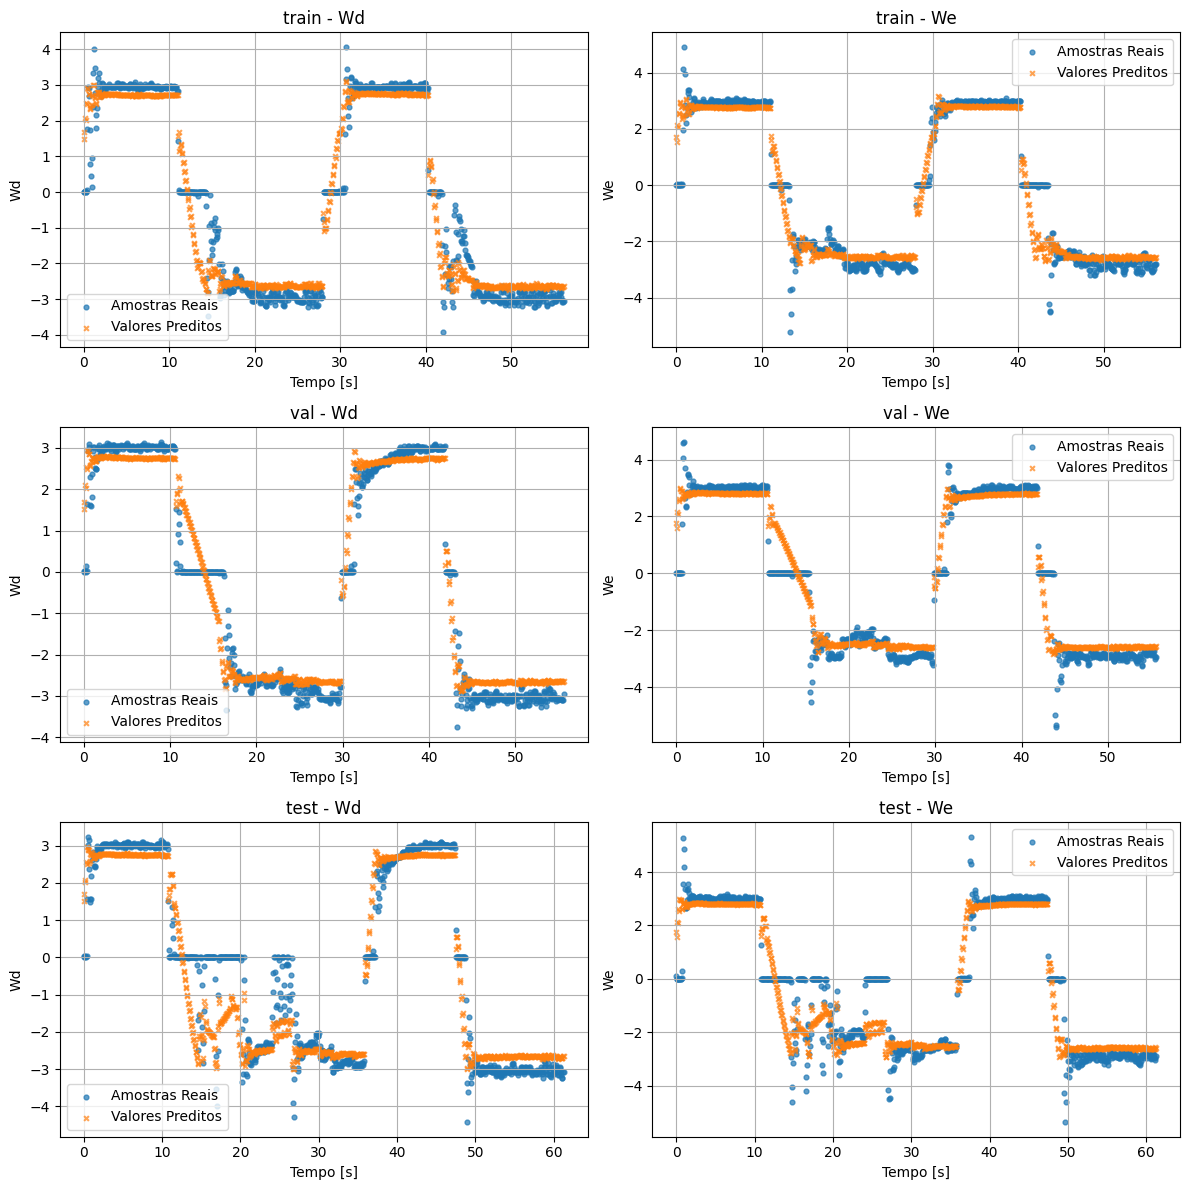

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9308, MSE = 4.6472e-01
We | train -> R² = 0.9328, MSE = 4.4738e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9487, MSE = 3.5201e-01
We | val -> R² = 0.9258, MSE = 5.1970e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.8894, MSE = 6.8253e-01
We | test -> R² = 0.8544, MSE = 9.2105e-01


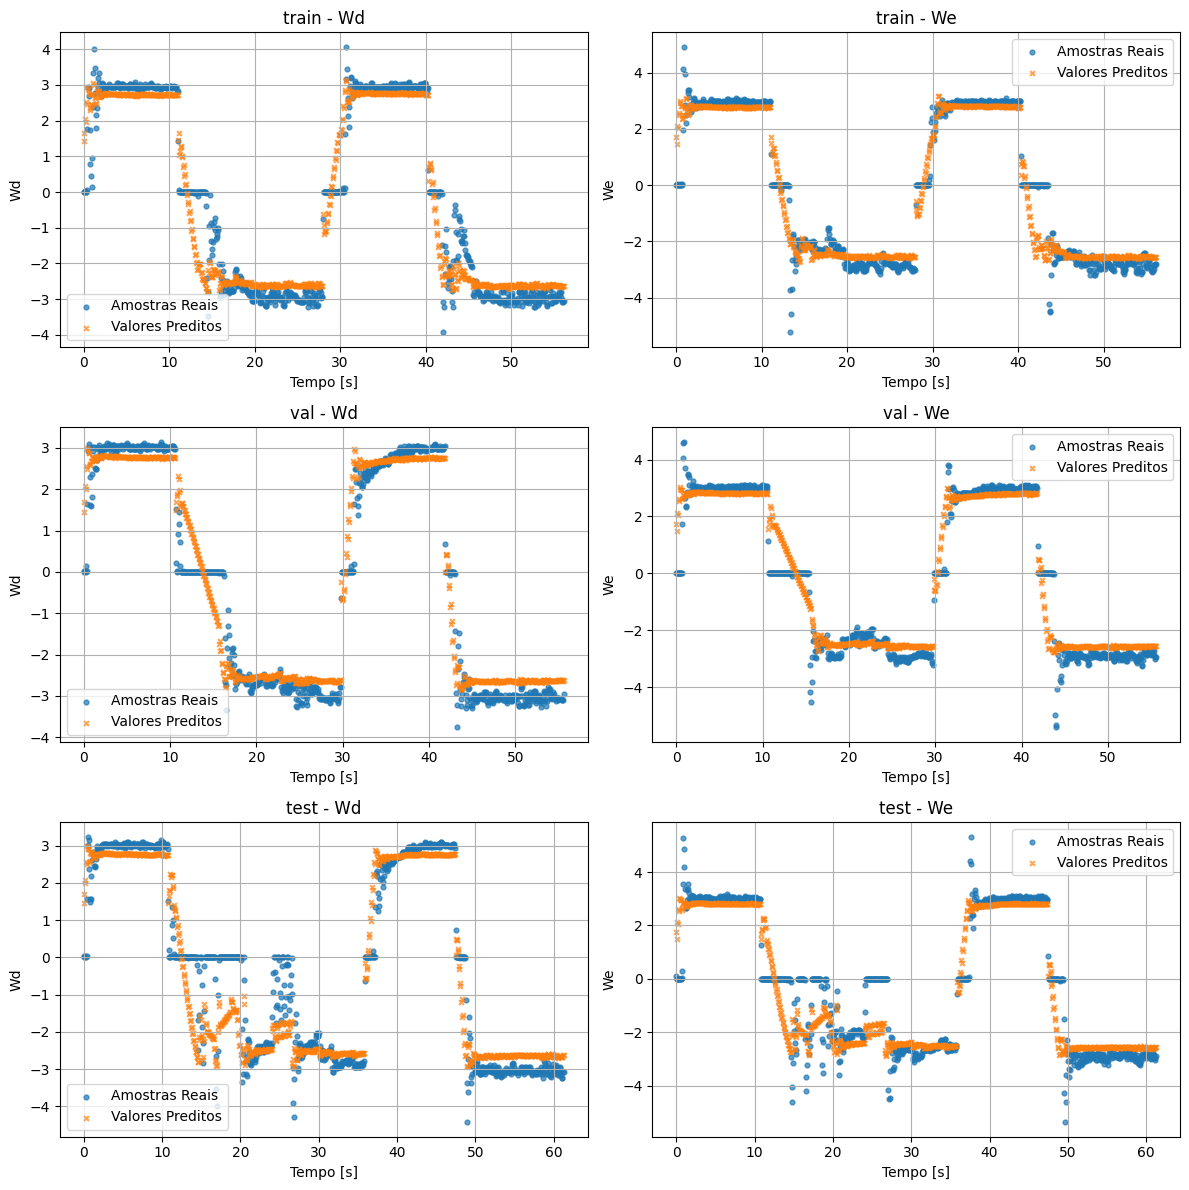

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Wd | train -> R² = 0.9303, MSE = 4.6794e-01
We | train -> R² = 0.9350, MSE = 4.3283e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9501, MSE = 3.4251e-01
We | val -> R² = 0.9299, MSE = 4.9081e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.8893, MSE = 6.8354e-01
We | test -> R² = 0.8631, MSE = 8.6605e-01


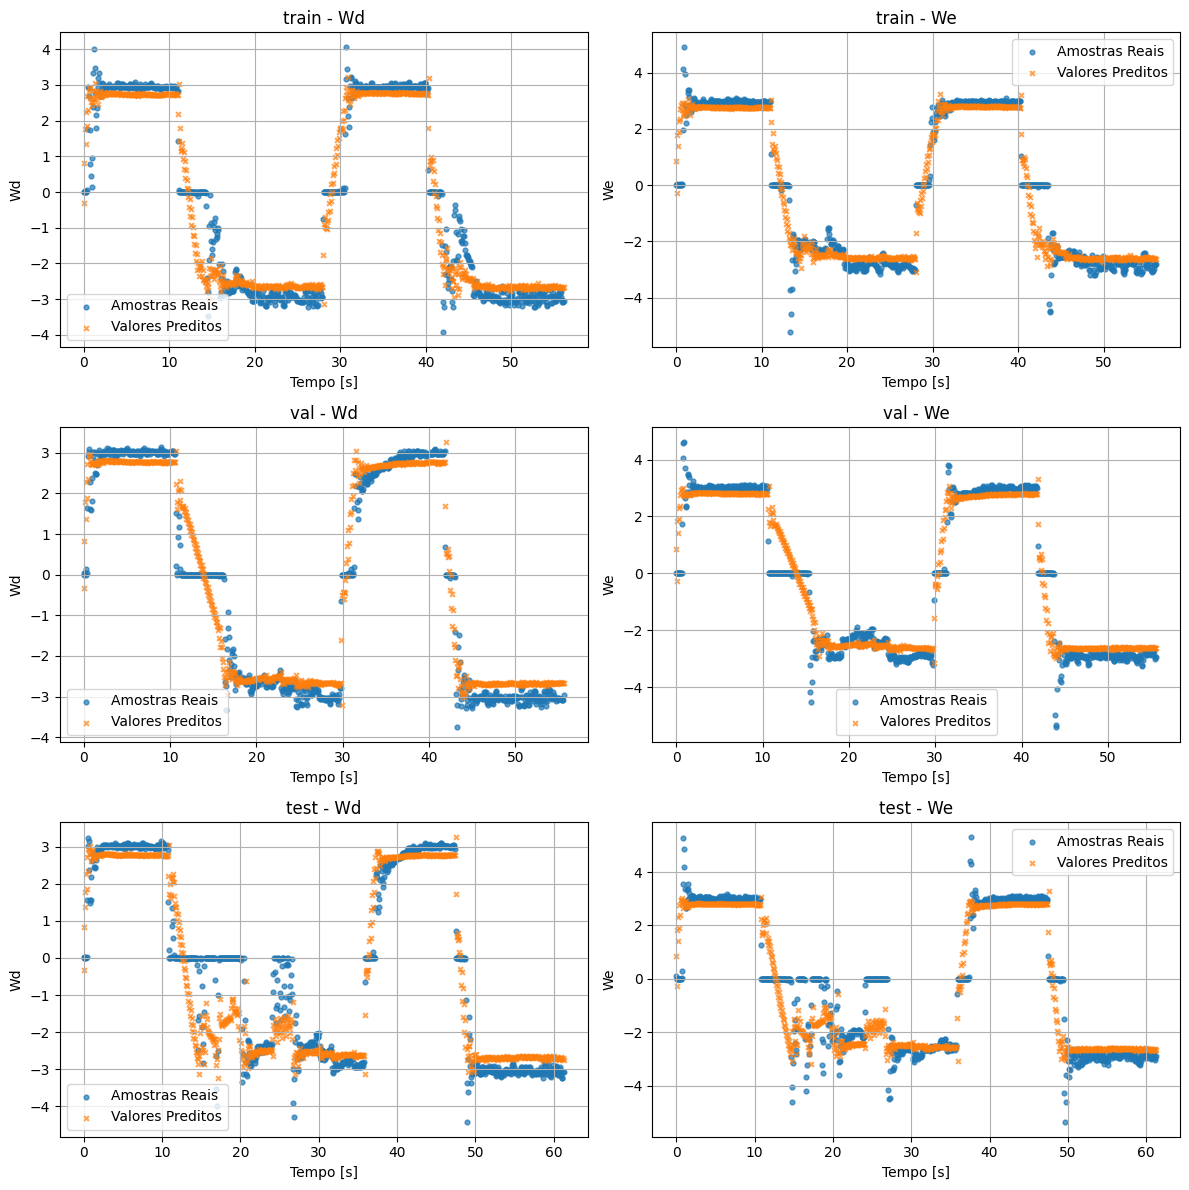

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Wd | train -> R² = 0.9324, MSE = 4.5395e-01
We | train -> R² = 0.9334, MSE = 4.4385e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9495, MSE = 3.4686e-01
We | val -> R² = 0.9252, MSE = 5.2354e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.8938, MSE = 6.5538e-01
We | test -> R² = 0.8559, MSE = 9.1097e-01


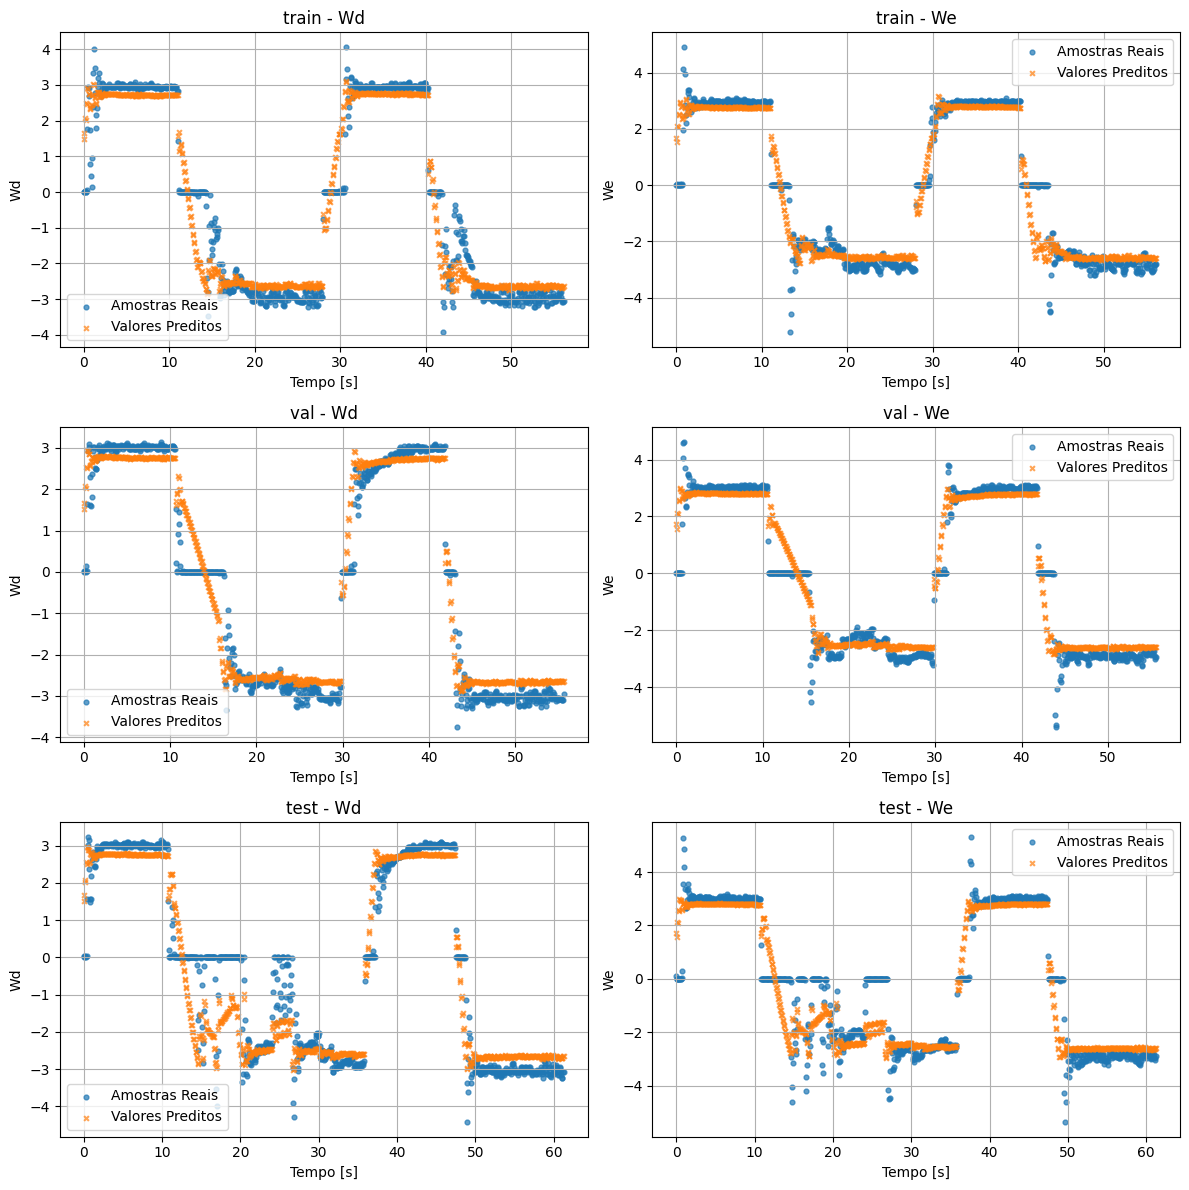

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9720, MSE = 1.8833e-01
We | train -> R² = 0.9548, MSE = 3.0083e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9872, MSE = 8.7625e-02
We | val -> R² = 0.9521, MSE = 3.3559e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9662, MSE = 2.0846e-01
We | test -> R² = 0.9133, MSE = 5.4836e-01


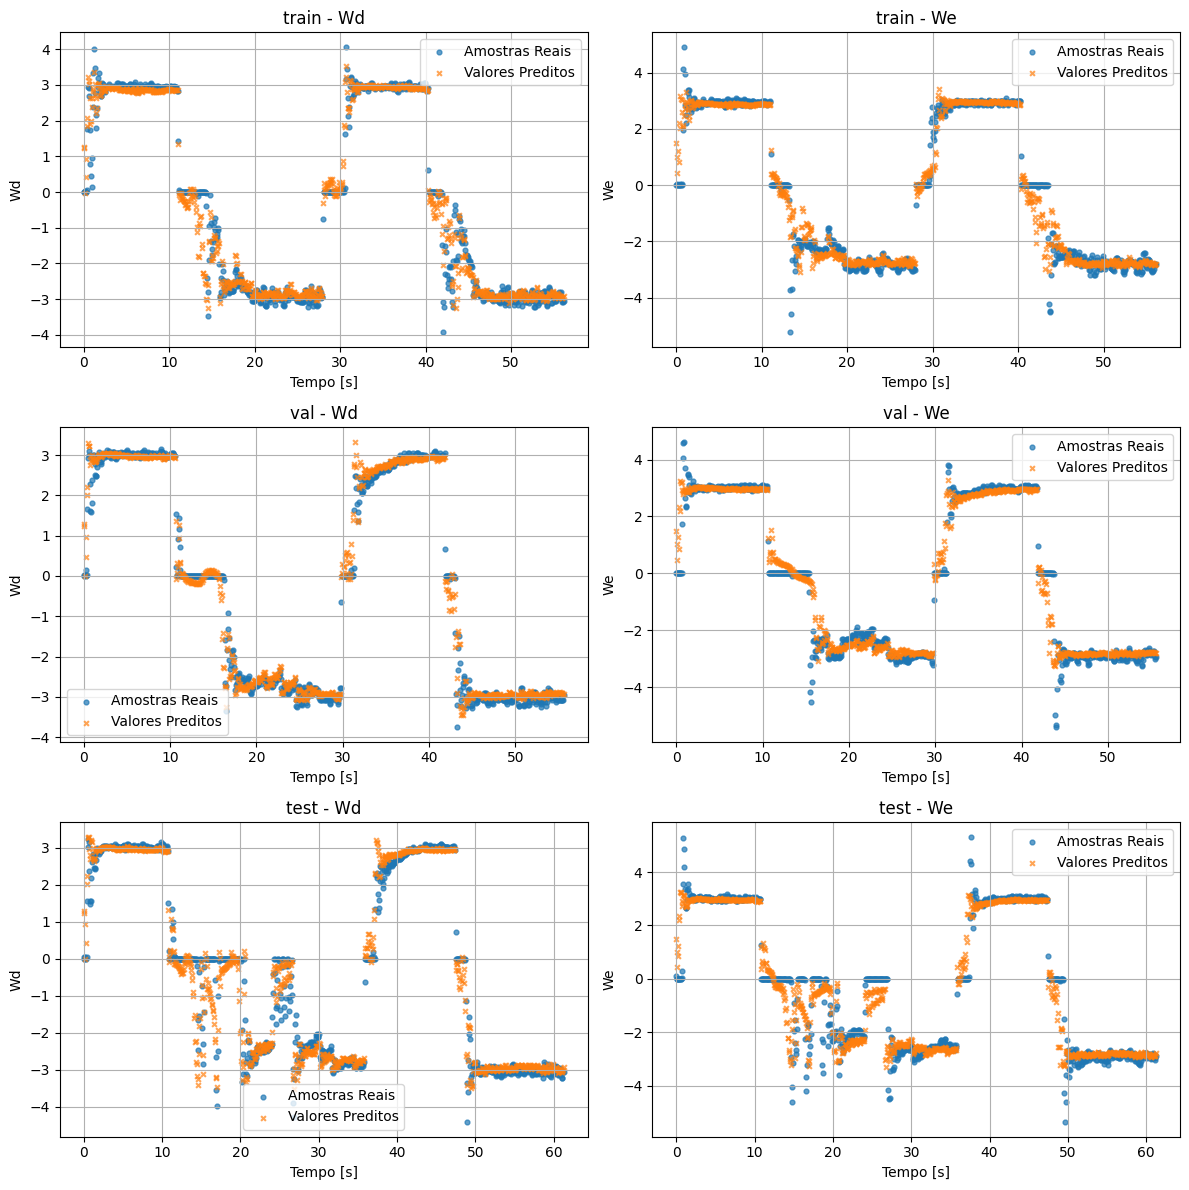

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Wd | train -> R² = 0.9569, MSE = 2.8964e-01
We | train -> R² = 0.9488, MSE = 3.4102e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9596, MSE = 2.7699e-01
We | val -> R² = 0.9422, MSE = 4.0461e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9319, MSE = 4.2035e-01
We | test -> R² = 0.8825, MSE = 7.4302e-01


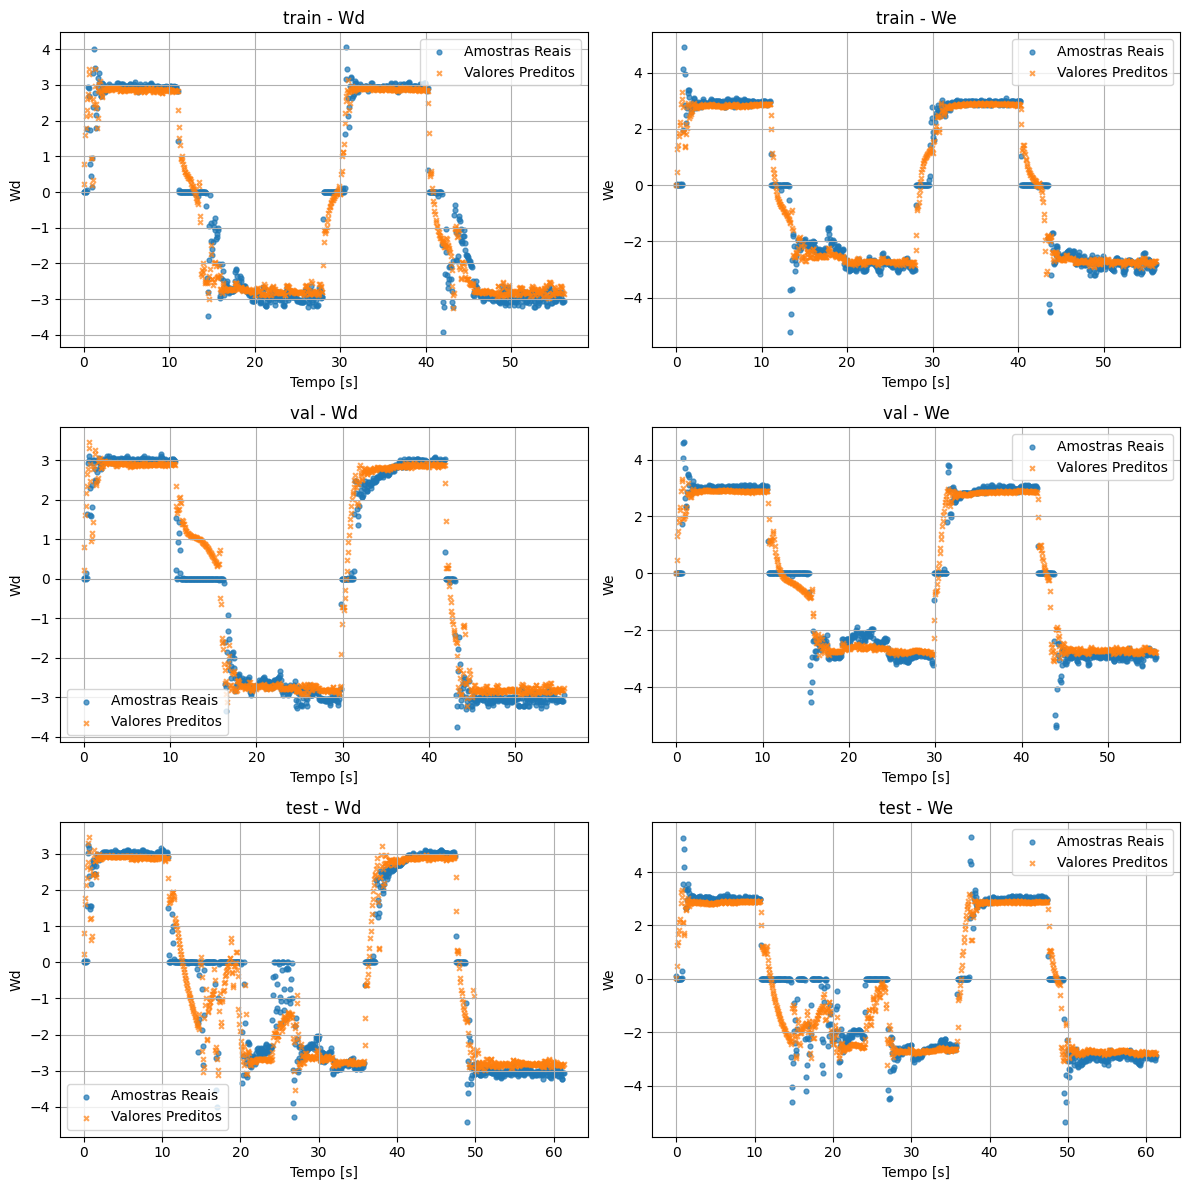

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Wd | train -> R² = 0.9690, MSE = 2.0824e-01
We | train -> R² = 0.9547, MSE = 3.0147e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9842, MSE = 1.0822e-01
We | val -> R² = 0.9496, MSE = 3.5286e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9635, MSE = 2.2563e-01
We | test -> R² = 0.9083, MSE = 5.7961e-01


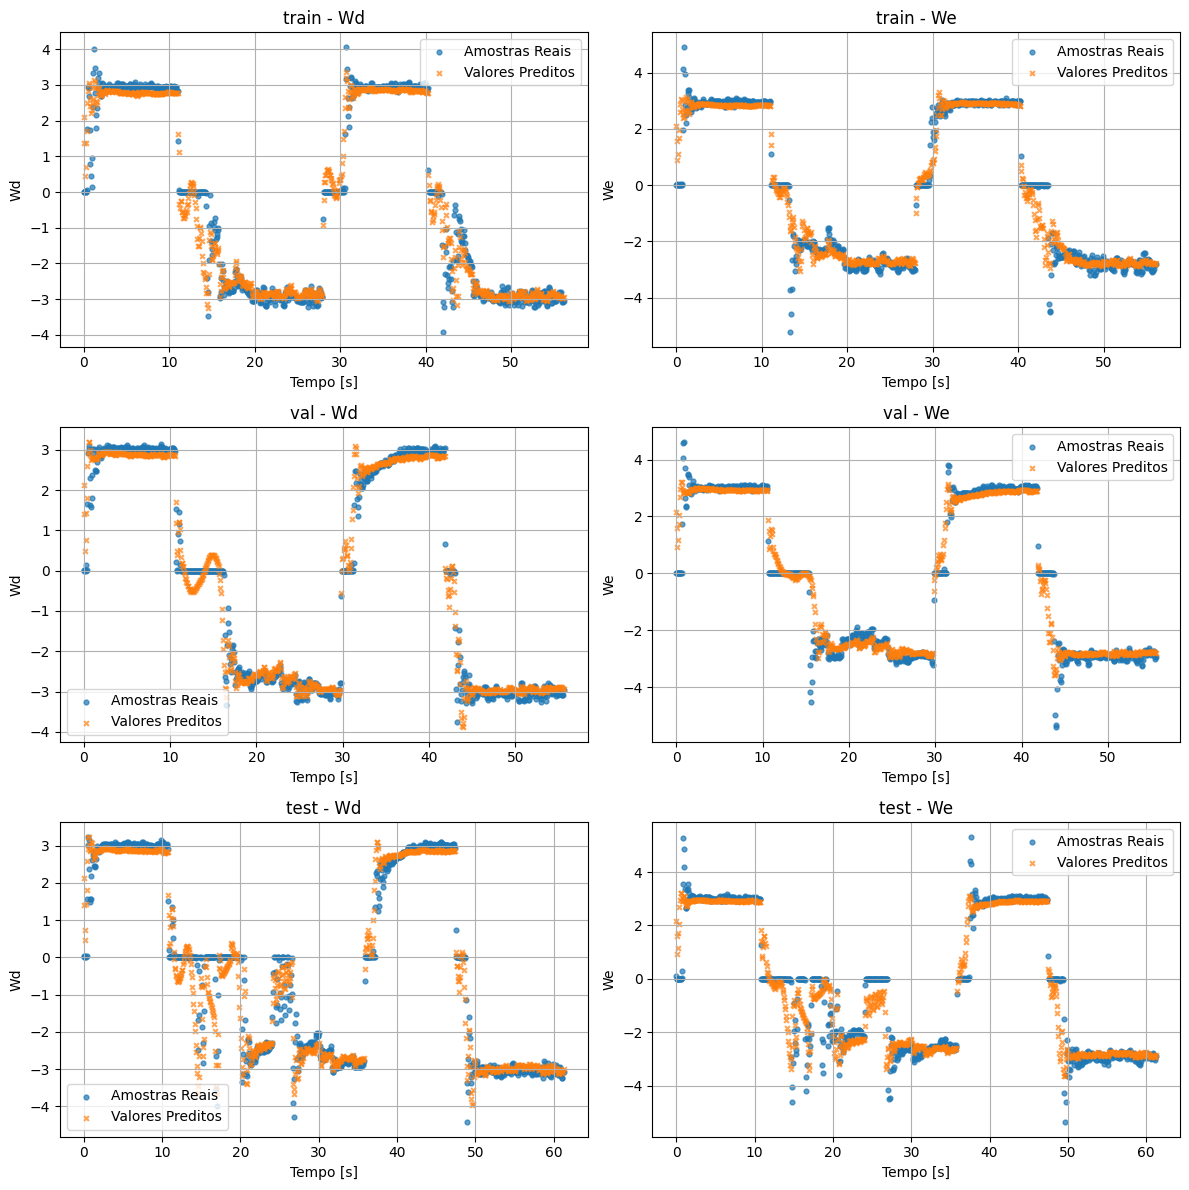

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9592, MSE = 2.7433e-01
We | train -> R² = 0.9584, MSE = 2.7710e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9629, MSE = 2.5462e-01
We | val -> R² = 0.9376, MSE = 4.3661e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9406, MSE = 3.6657e-01
We | test -> R² = 0.9032, MSE = 6.1240e-01


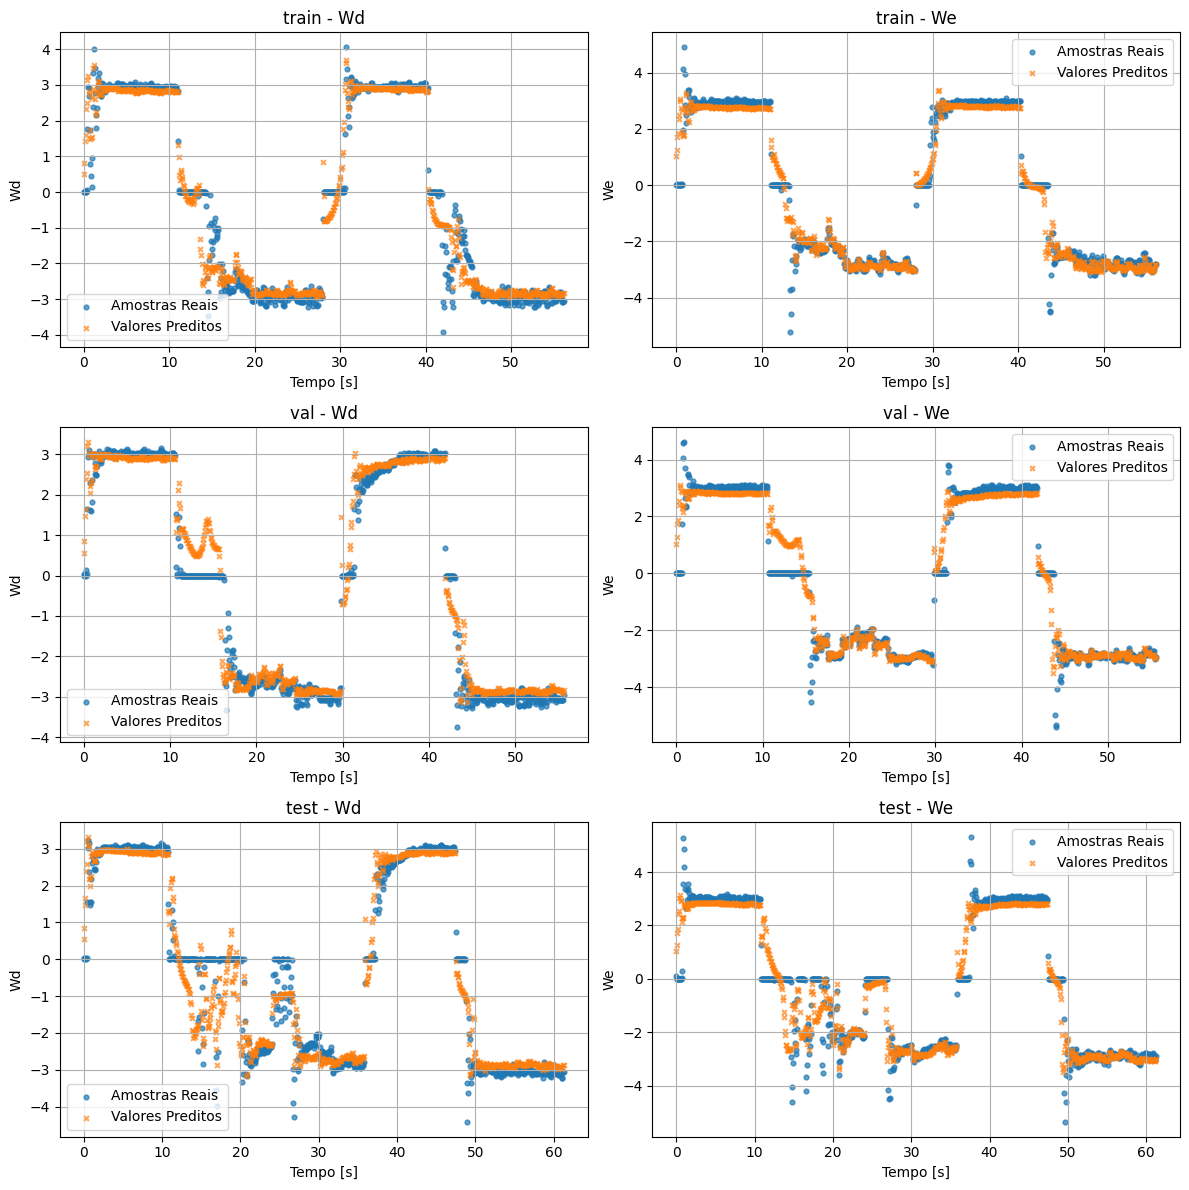

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9548, MSE = 3.0351e-01
We | train -> R² = 0.9485, MSE = 3.4338e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9593, MSE = 2.7930e-01
We | val -> R² = 0.9385, MSE = 4.3014e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.9334, MSE = 4.1091e-01
We | test -> R² = 0.8831, MSE = 7.3917e-01


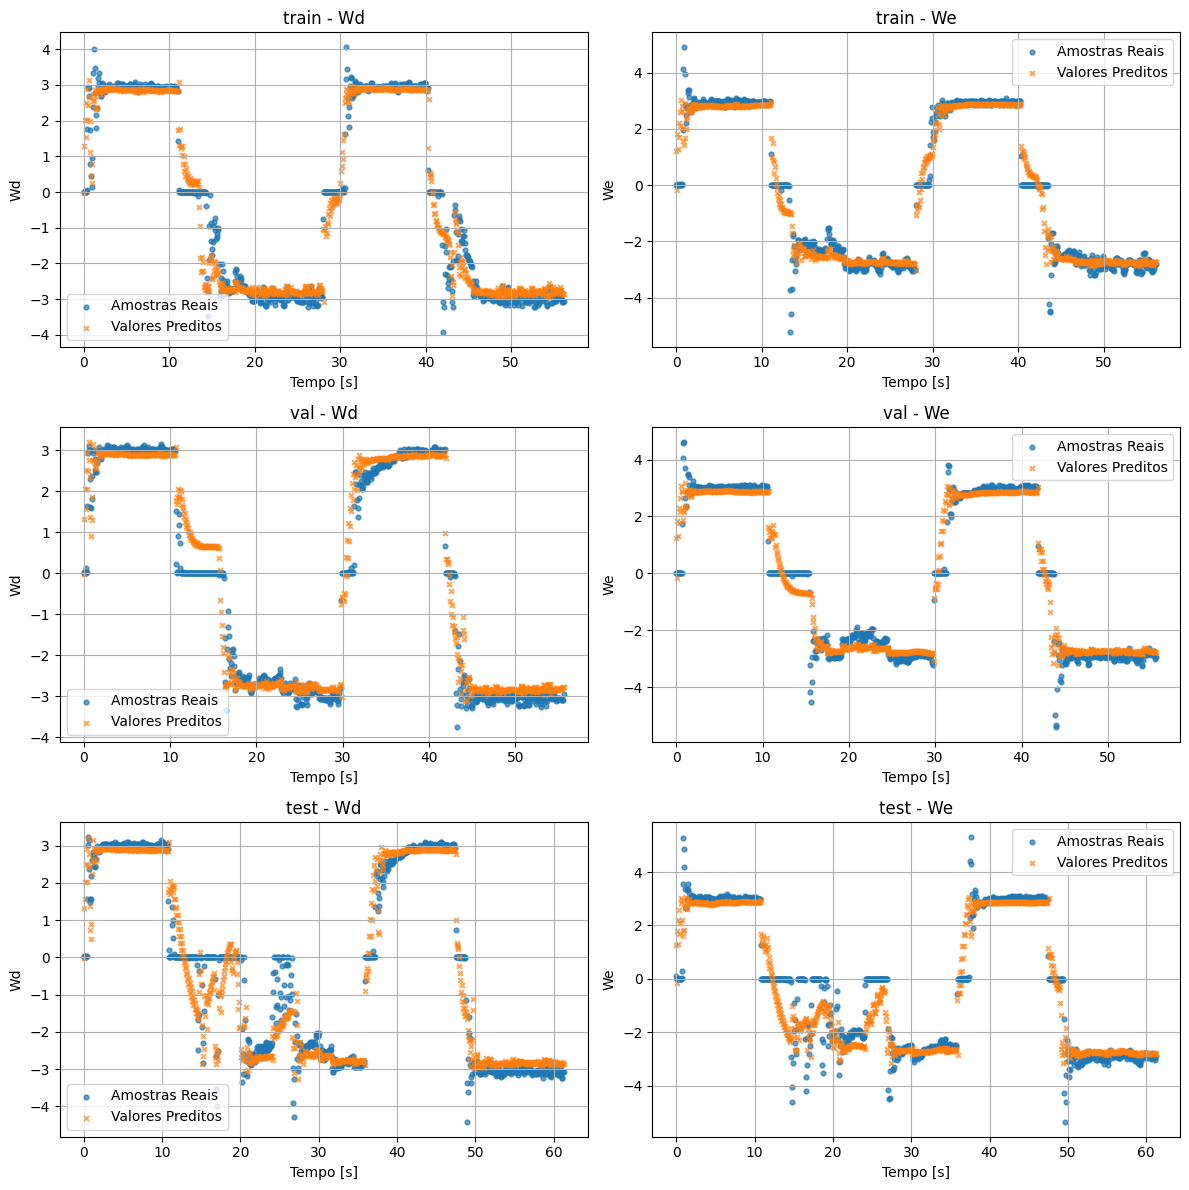

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Wd | train -> R² = 0.9436, MSE = 3.7866e-01
We | train -> R² = 0.9480, MSE = 3.4623e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9455, MSE = 3.7378e-01
We | val -> R² = 0.9364, MSE = 4.4520e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.9131, MSE = 5.3666e-01
We | test -> R² = 0.8685, MSE = 8.3144e-01


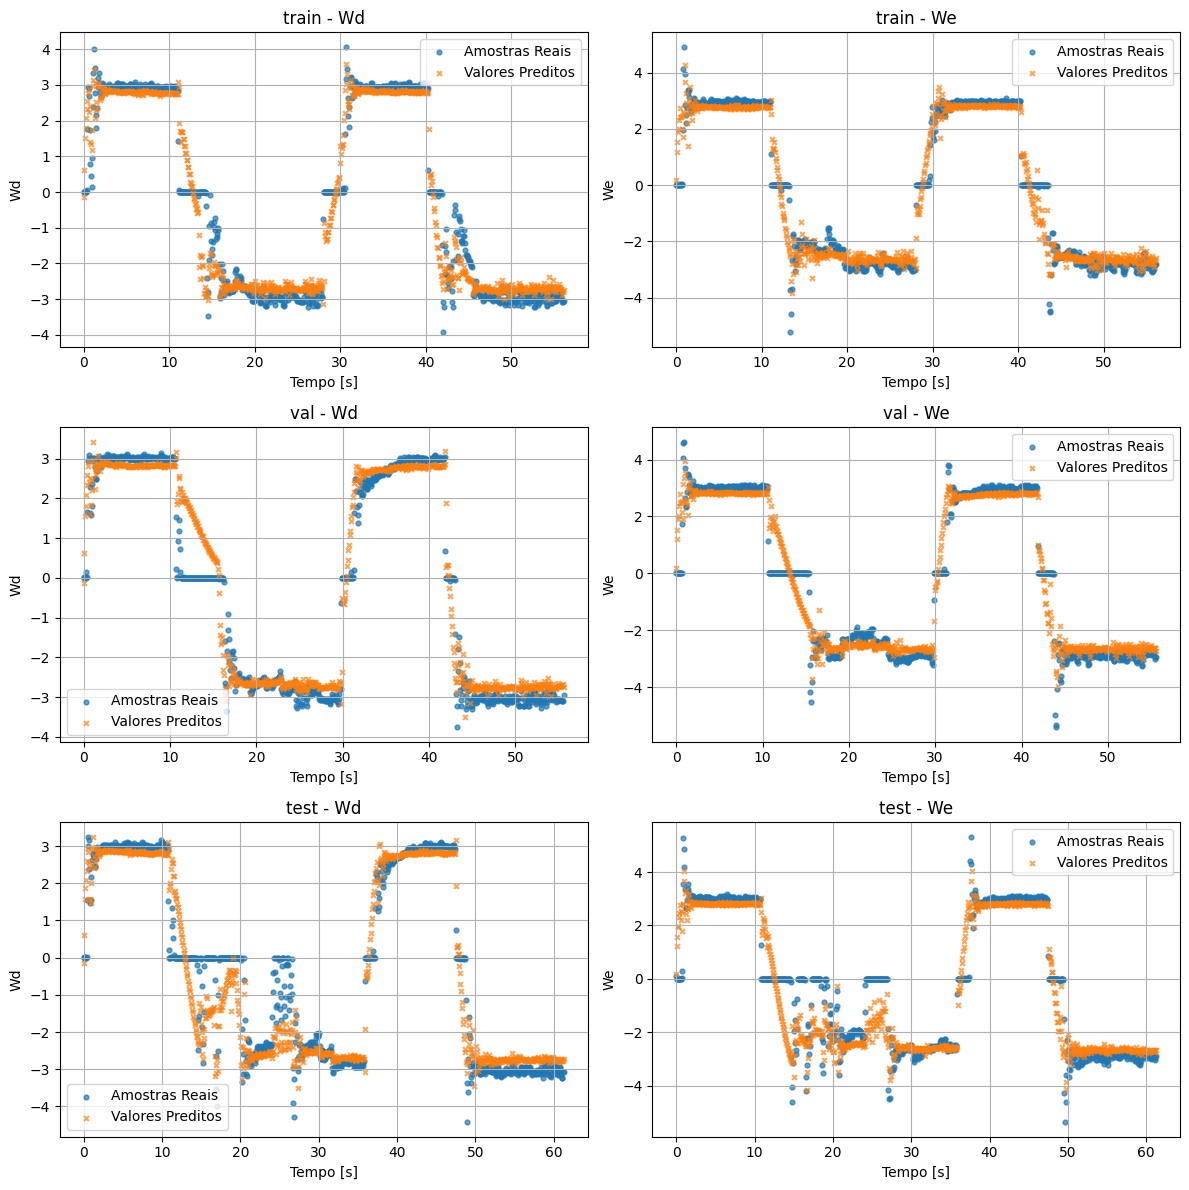

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Wd | train -> R² = 0.9543, MSE = 3.0700e-01
We | train -> R² = 0.9508, MSE = 3.2764e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9592, MSE = 2.8012e-01
We | val -> R² = 0.9390, MSE = 4.2681e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9273, MSE = 4.4875e-01
We | test -> R² = 0.8806, MSE = 7.5535e-01


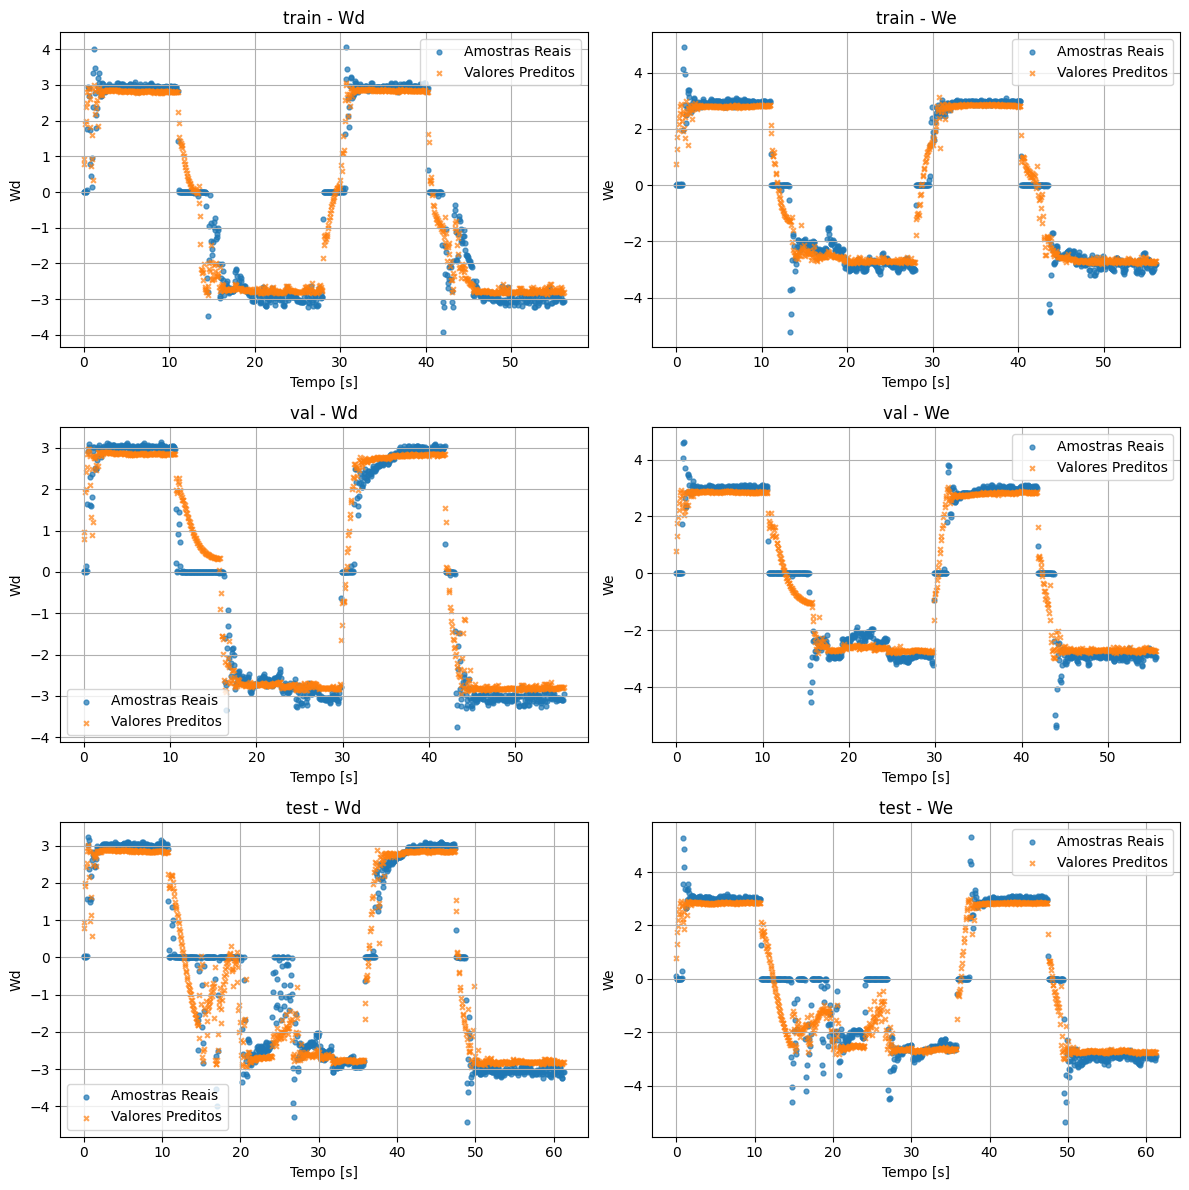

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Wd | train -> R² = 0.9664, MSE = 2.2566e-01
We | train -> R² = 0.9576, MSE = 2.8257e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9693, MSE = 2.1102e-01
We | val -> R² = 0.9460, MSE = 3.7814e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9509, MSE = 3.0300e-01
We | test -> R² = 0.9015, MSE = 6.2300e-01


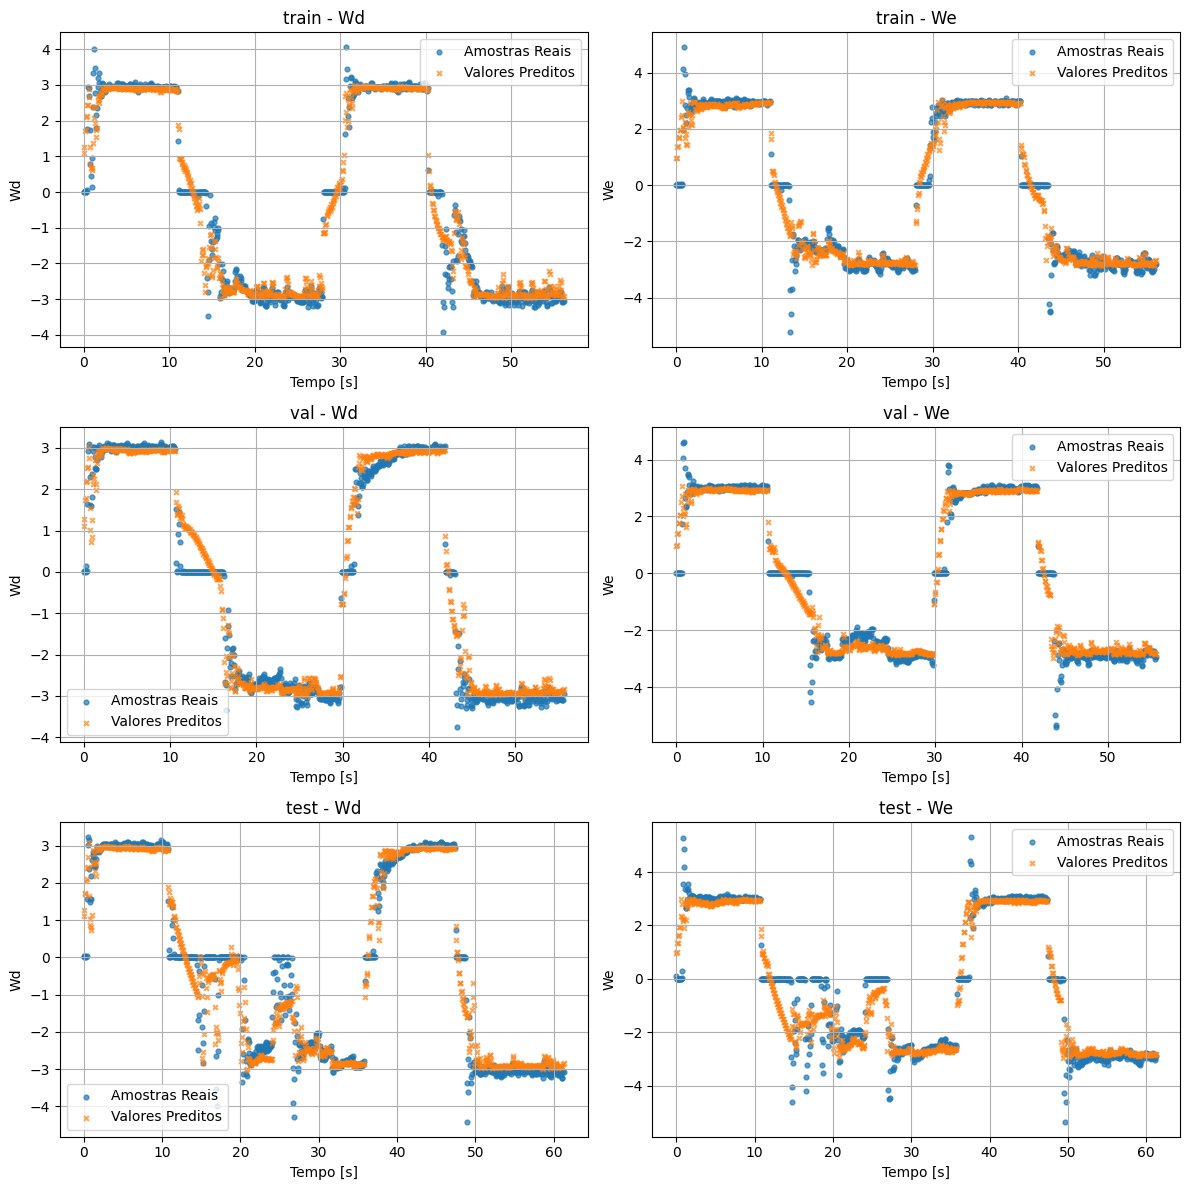

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Wd | train -> R² = 0.9772, MSE = 1.5307e-01
We | train -> R² = 0.9554, MSE = 2.9689e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9873, MSE = 8.7177e-02
We | val -> R² = 0.9498, MSE = 3.5164e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Wd | test -> R² = 0.9678, MSE = 1.9900e-01
We | test -> R² = 0.8999, MSE = 6.3295e-01


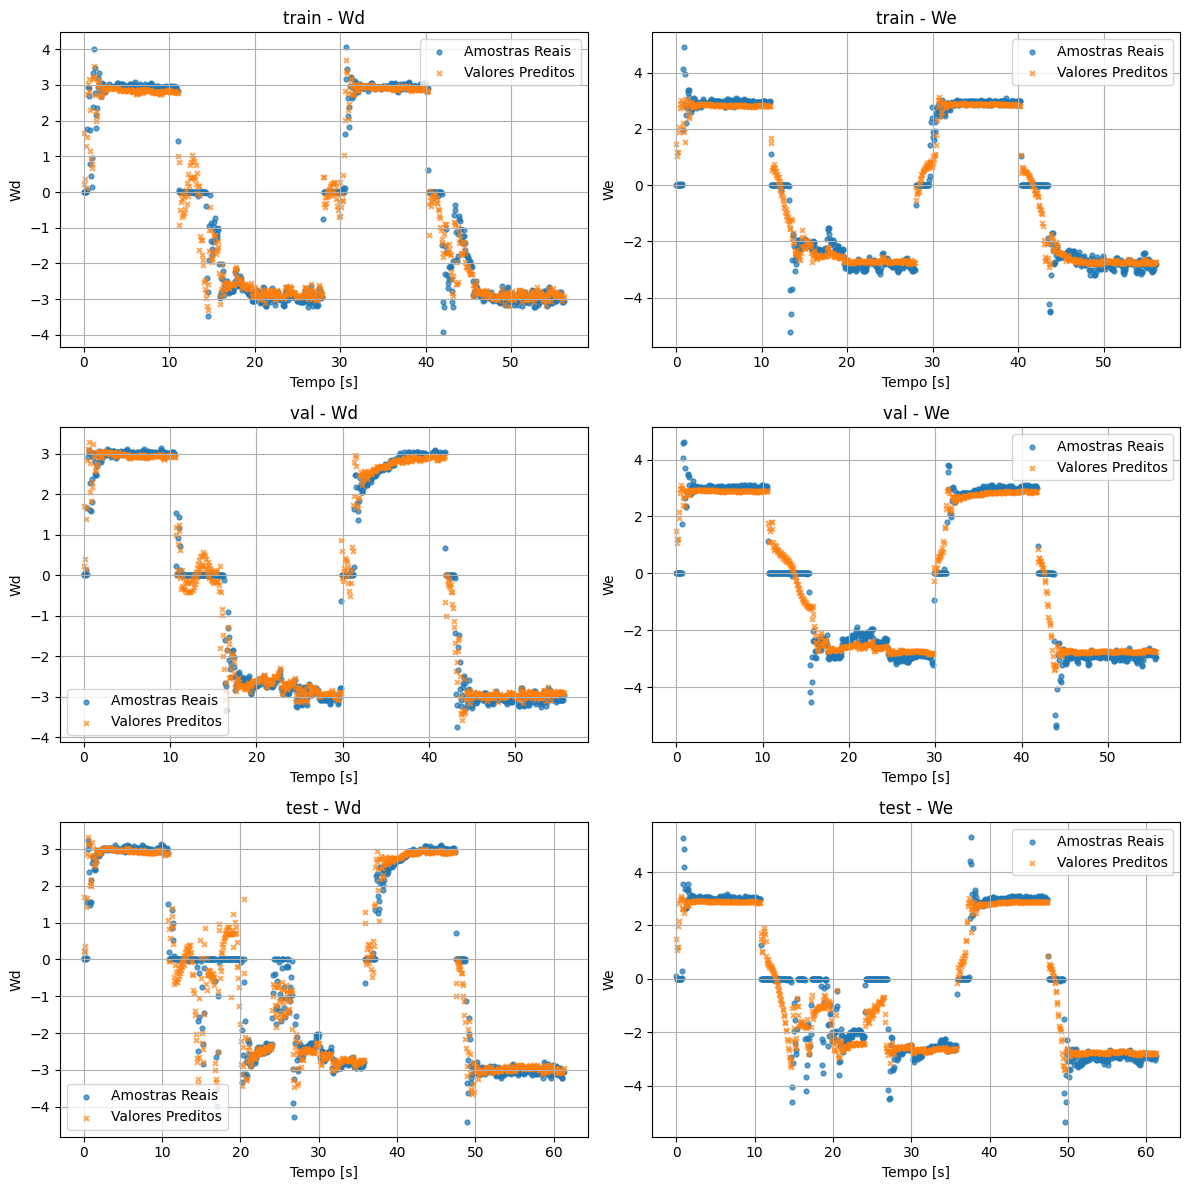

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Wd | train -> R² = 0.9729, MSE = 1.8233e-01
We | train -> R² = 0.9584, MSE = 2.7717e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9802, MSE = 1.3556e-01
We | val -> R² = 0.9512, MSE = 3.4136e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9658, MSE = 2.1091e-01
We | test -> R² = 0.9059, MSE = 5.9514e-01


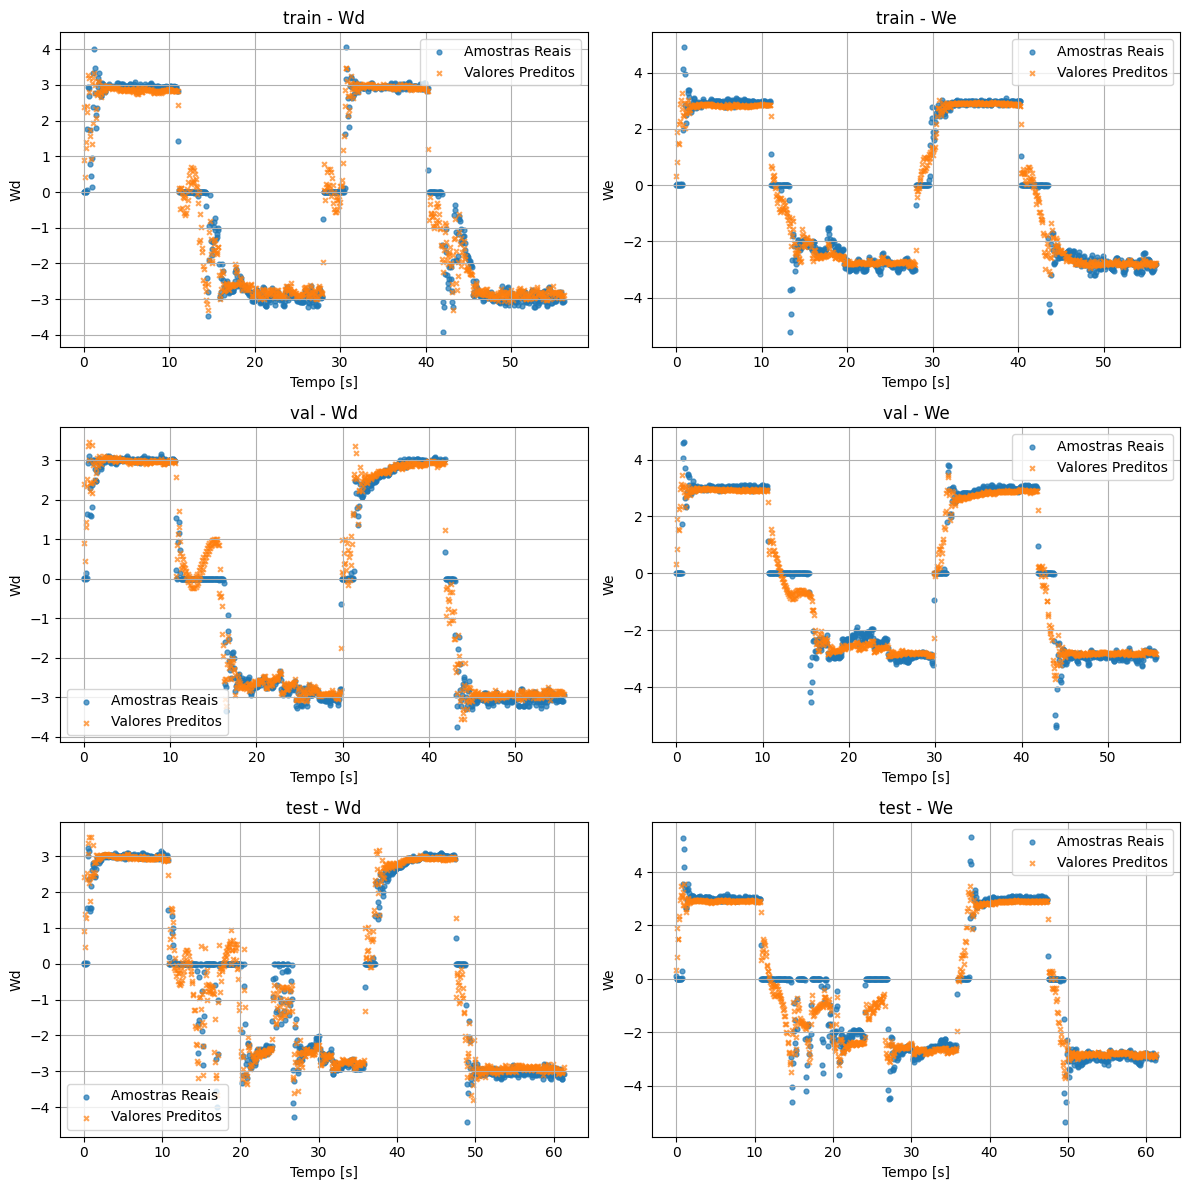

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Wd | train -> R² = 0.9732, MSE = 1.8015e-01
We | train -> R² = 0.9612, MSE = 2.5865e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9737, MSE = 1.8019e-01
We | val -> R² = 0.9471, MSE = 3.7007e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.9622, MSE = 2.3307e-01
We | test -> R² = 0.9018, MSE = 6.2123e-01


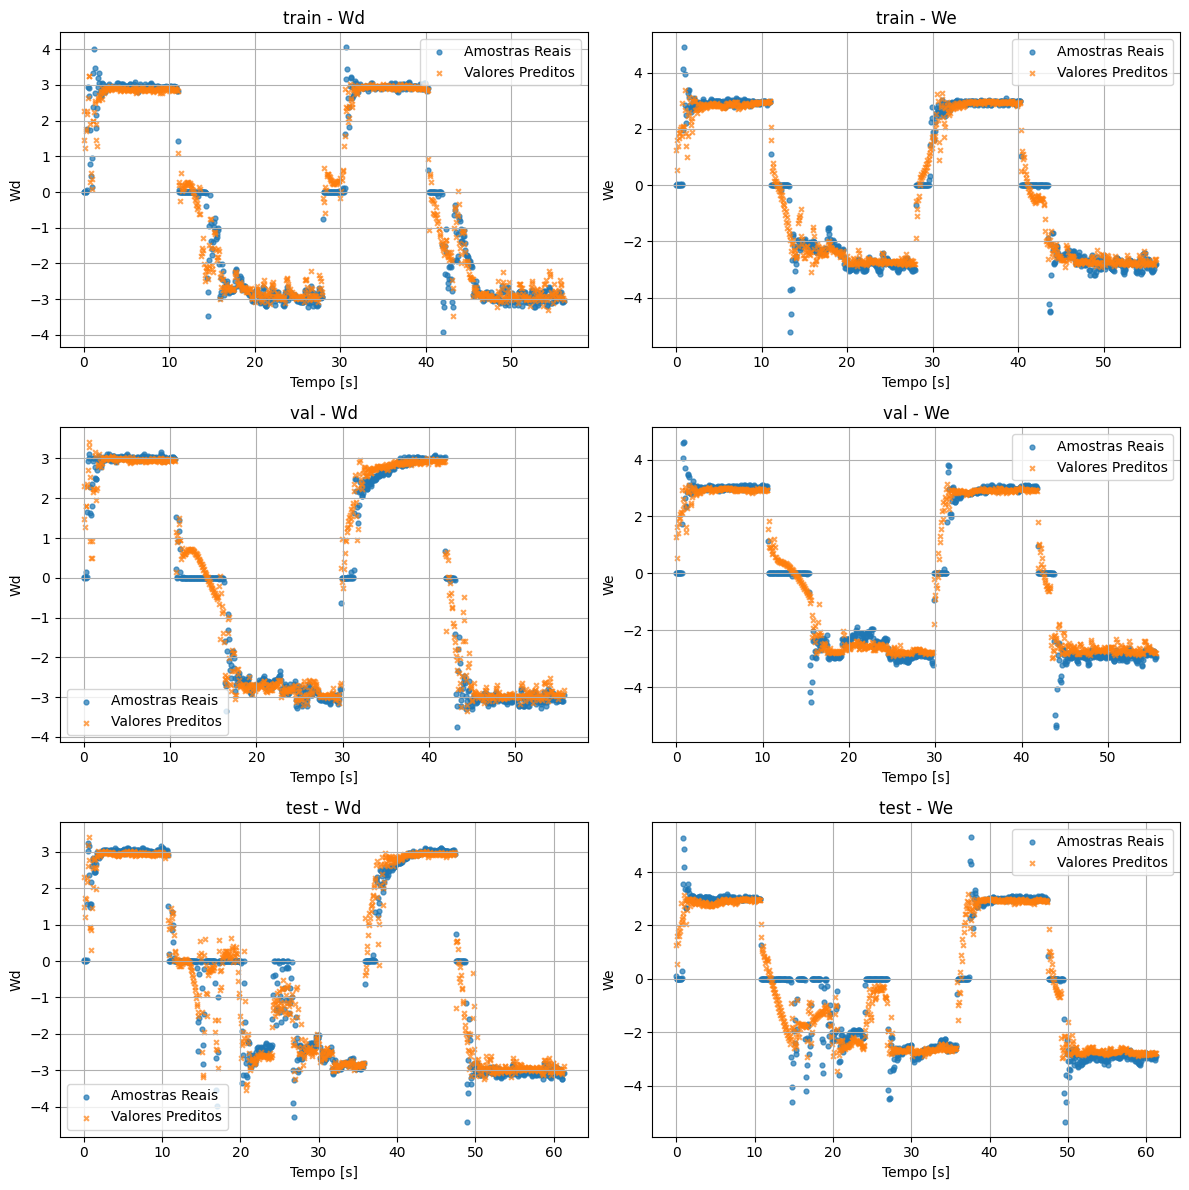

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9699, MSE = 2.0234e-01
We | train -> R² = 0.9685, MSE = 2.0982e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9802, MSE = 1.3584e-01
We | val -> R² = 0.9630, MSE = 2.5872e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9651, MSE = 2.1573e-01
We | test -> R² = 0.9297, MSE = 4.4487e-01


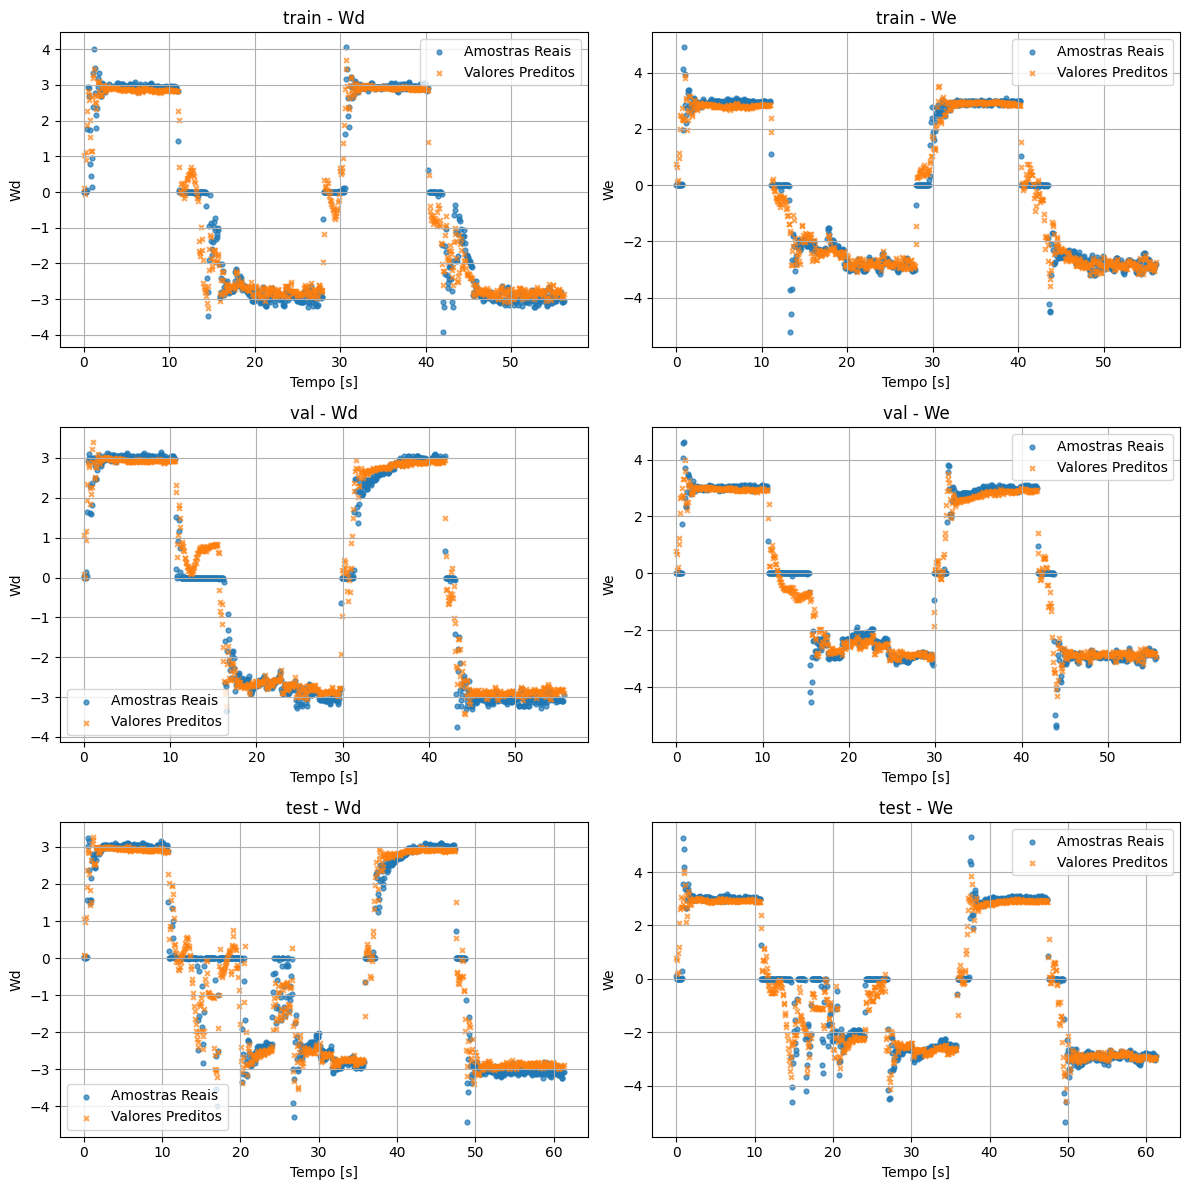

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Wd | train -> R² = 0.9646, MSE = 2.3761e-01
We | train -> R² = 0.9605, MSE = 2.6346e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9660, MSE = 2.3326e-01
We | val -> R² = 0.9502, MSE = 3.4836e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9506, MSE = 3.0518e-01
We | test -> R² = 0.8987, MSE = 6.4085e-01


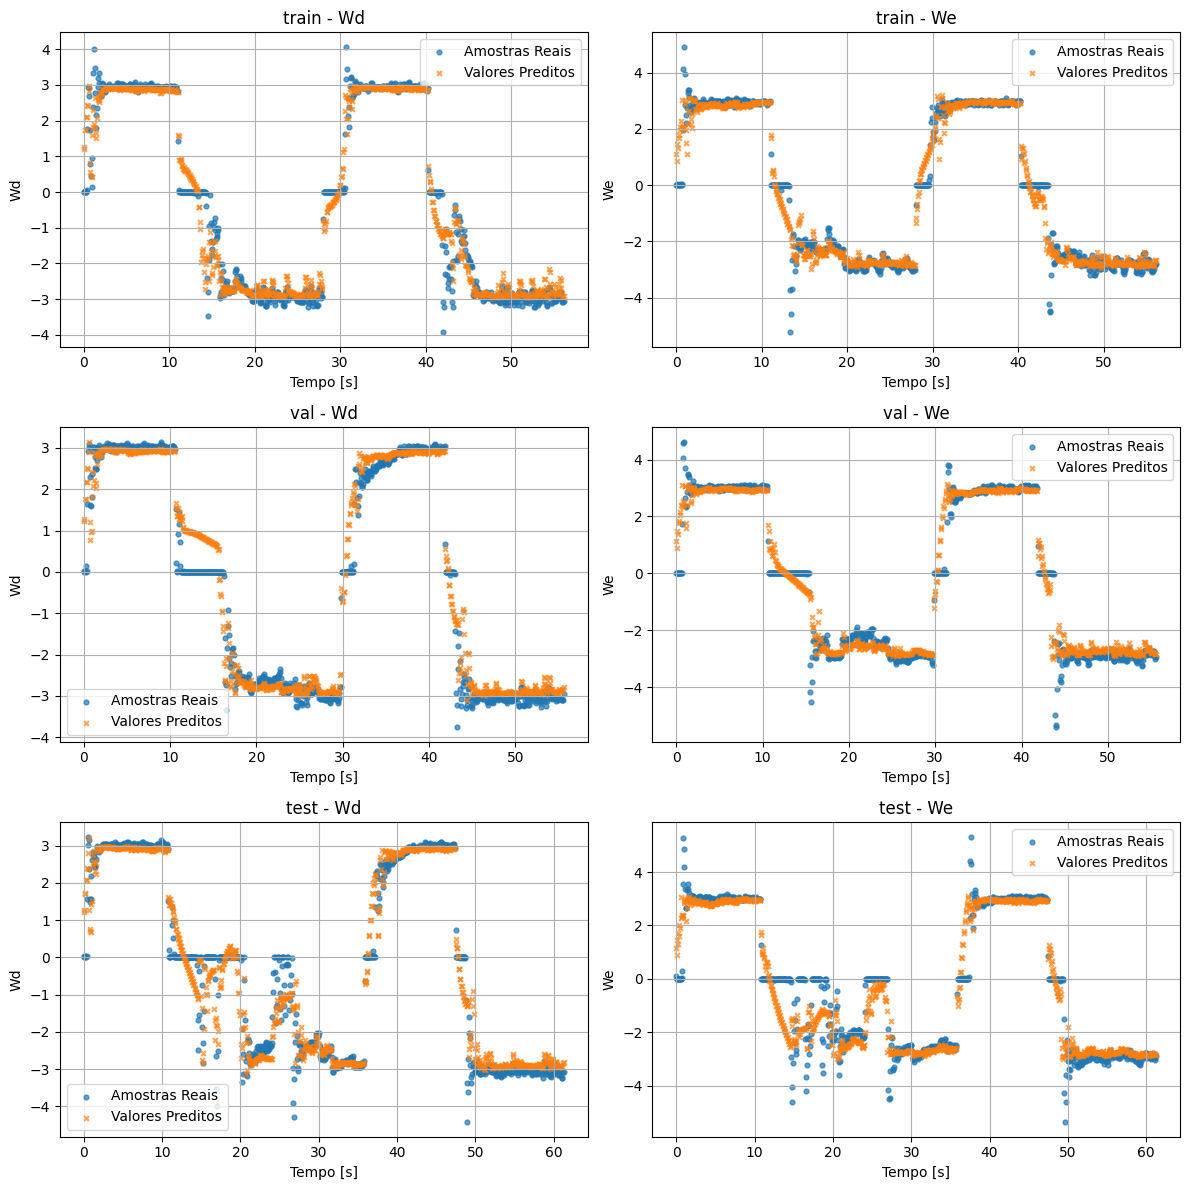

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Wd | train -> R² = 0.9784, MSE = 1.4528e-01
We | train -> R² = 0.9633, MSE = 2.4422e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9858, MSE = 9.7508e-02
We | val -> R² = 0.9613, MSE = 2.7086e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.9740, MSE = 1.6035e-01
We | test -> R² = 0.9170, MSE = 5.2468e-01


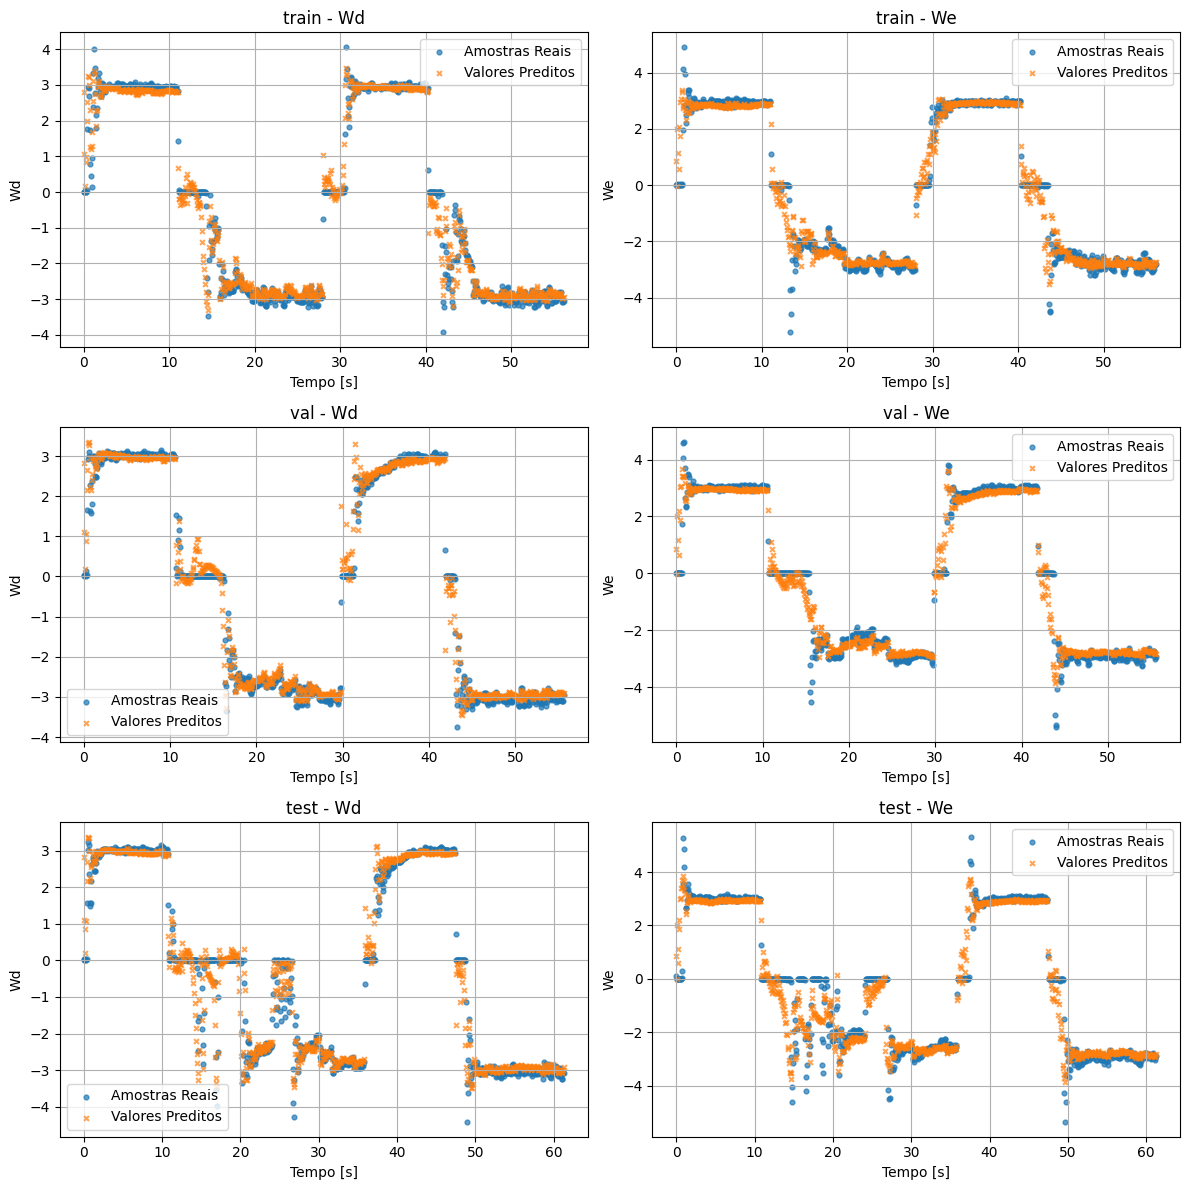

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9766, MSE = 1.5746e-01
We | train -> R² = 0.9686, MSE = 2.0890e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9848, MSE = 1.0461e-01
We | val -> R² = 0.9528, MSE = 3.3071e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.9696, MSE = 1.8746e-01
We | test -> R² = 0.9114, MSE = 5.6058e-01


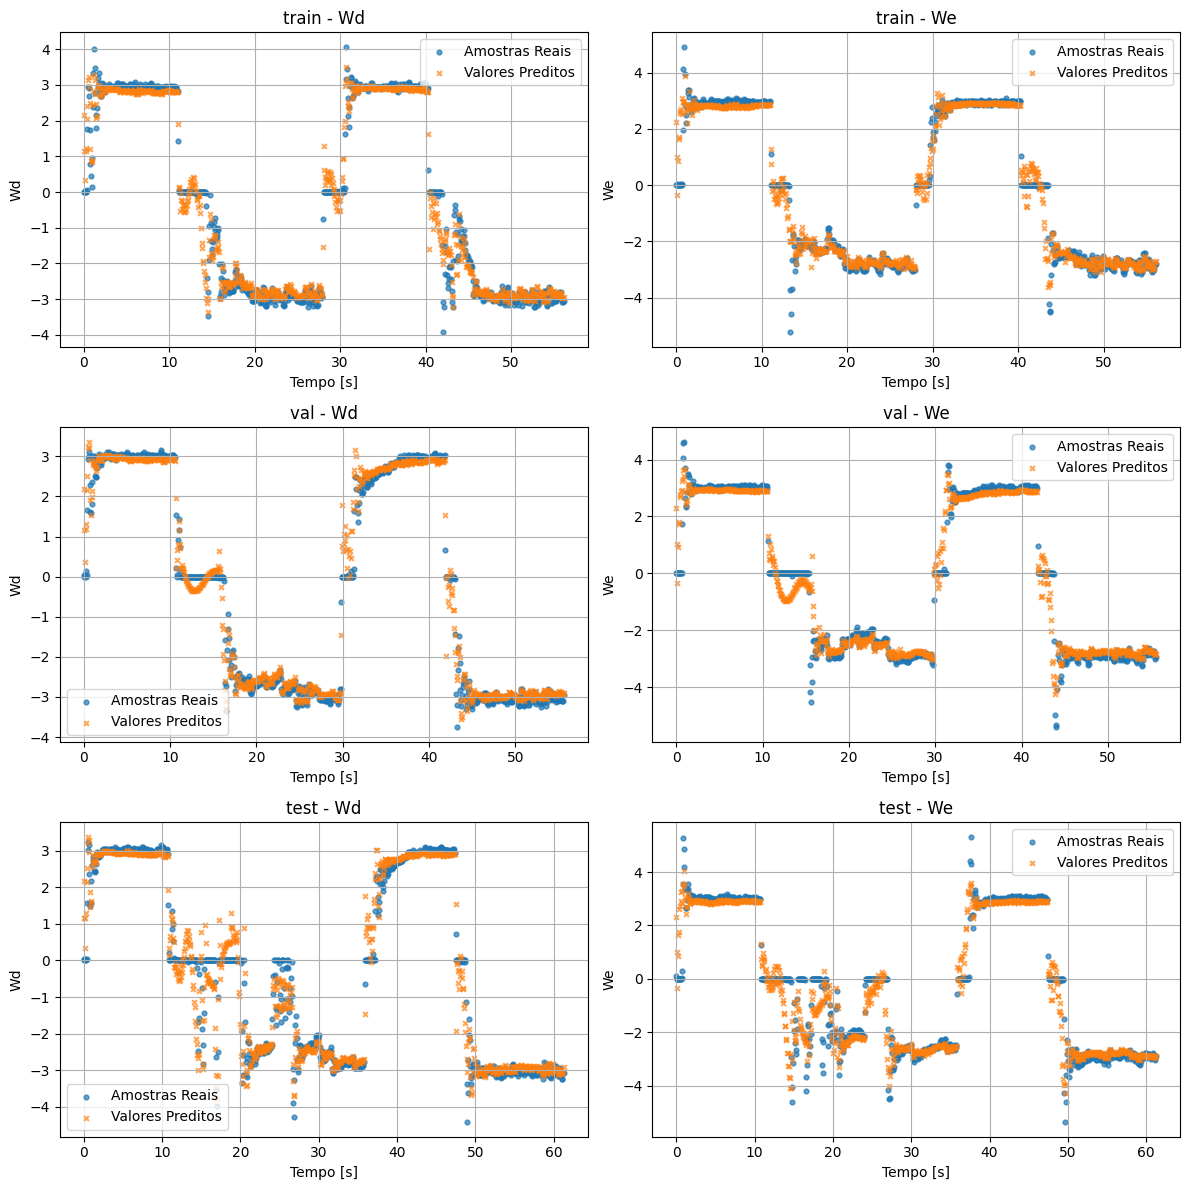

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9810, MSE = 1.2777e-01
We | train -> R² = 0.9718, MSE = 1.8754e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9874, MSE = 8.6753e-02
We | val -> R² = 0.9661, MSE = 2.3734e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9733, MSE = 1.6462e-01
We | test -> R² = 0.9250, MSE = 4.7411e-01


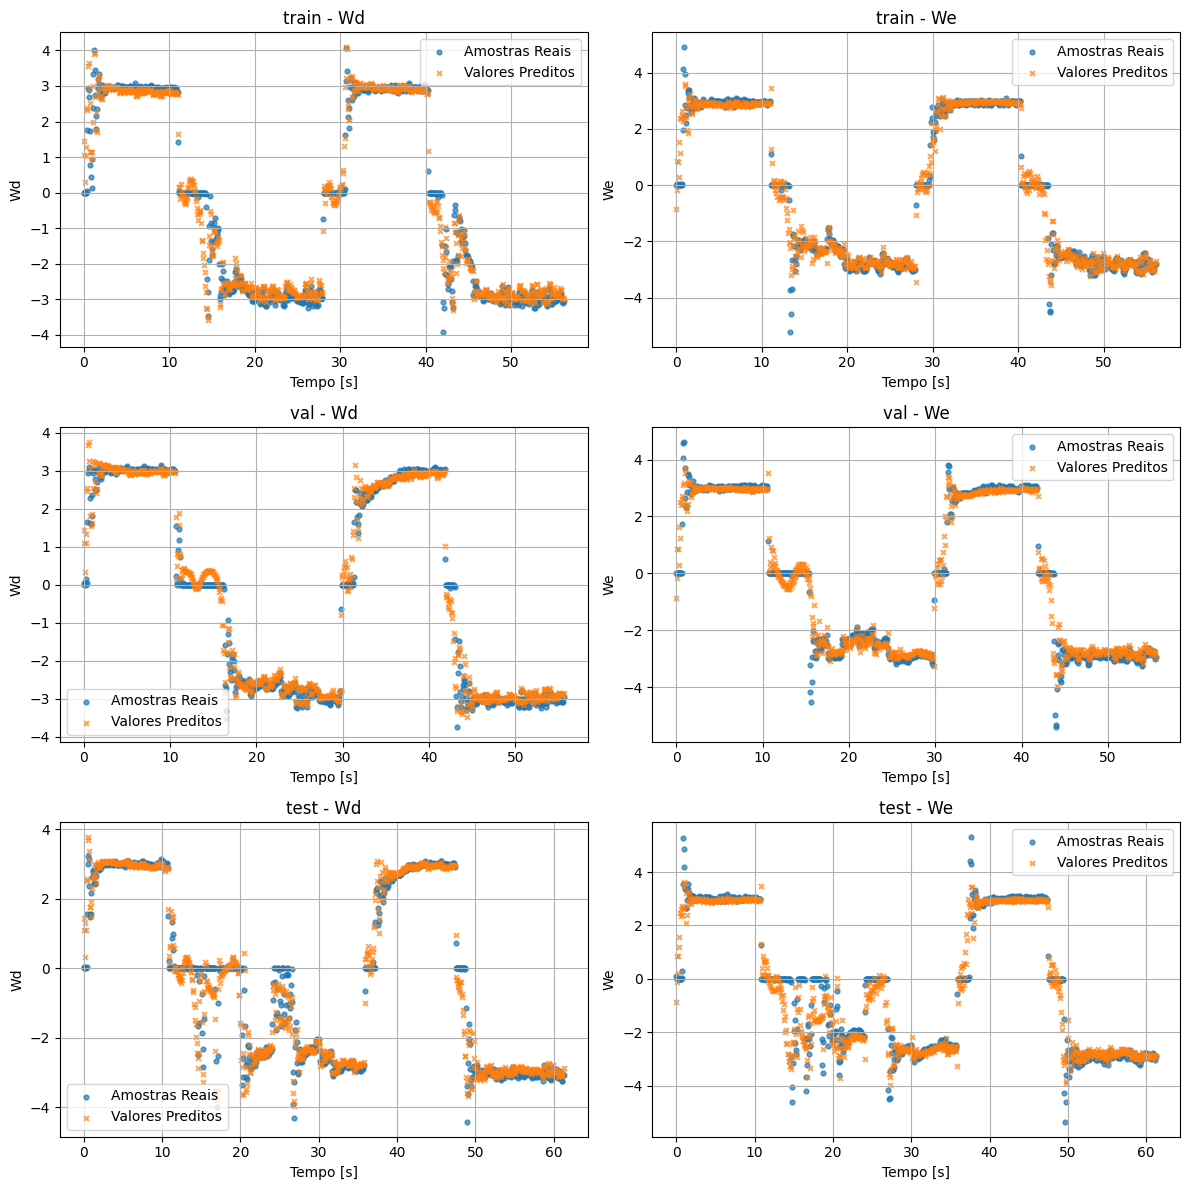

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9765, MSE = 1.5794e-01
We | train -> R² = 0.9679, MSE = 2.1401e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9809, MSE = 1.3080e-01
We | val -> R² = 0.9576, MSE = 2.9674e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9675, MSE = 2.0064e-01
We | test -> R² = 0.9033, MSE = 6.1162e-01


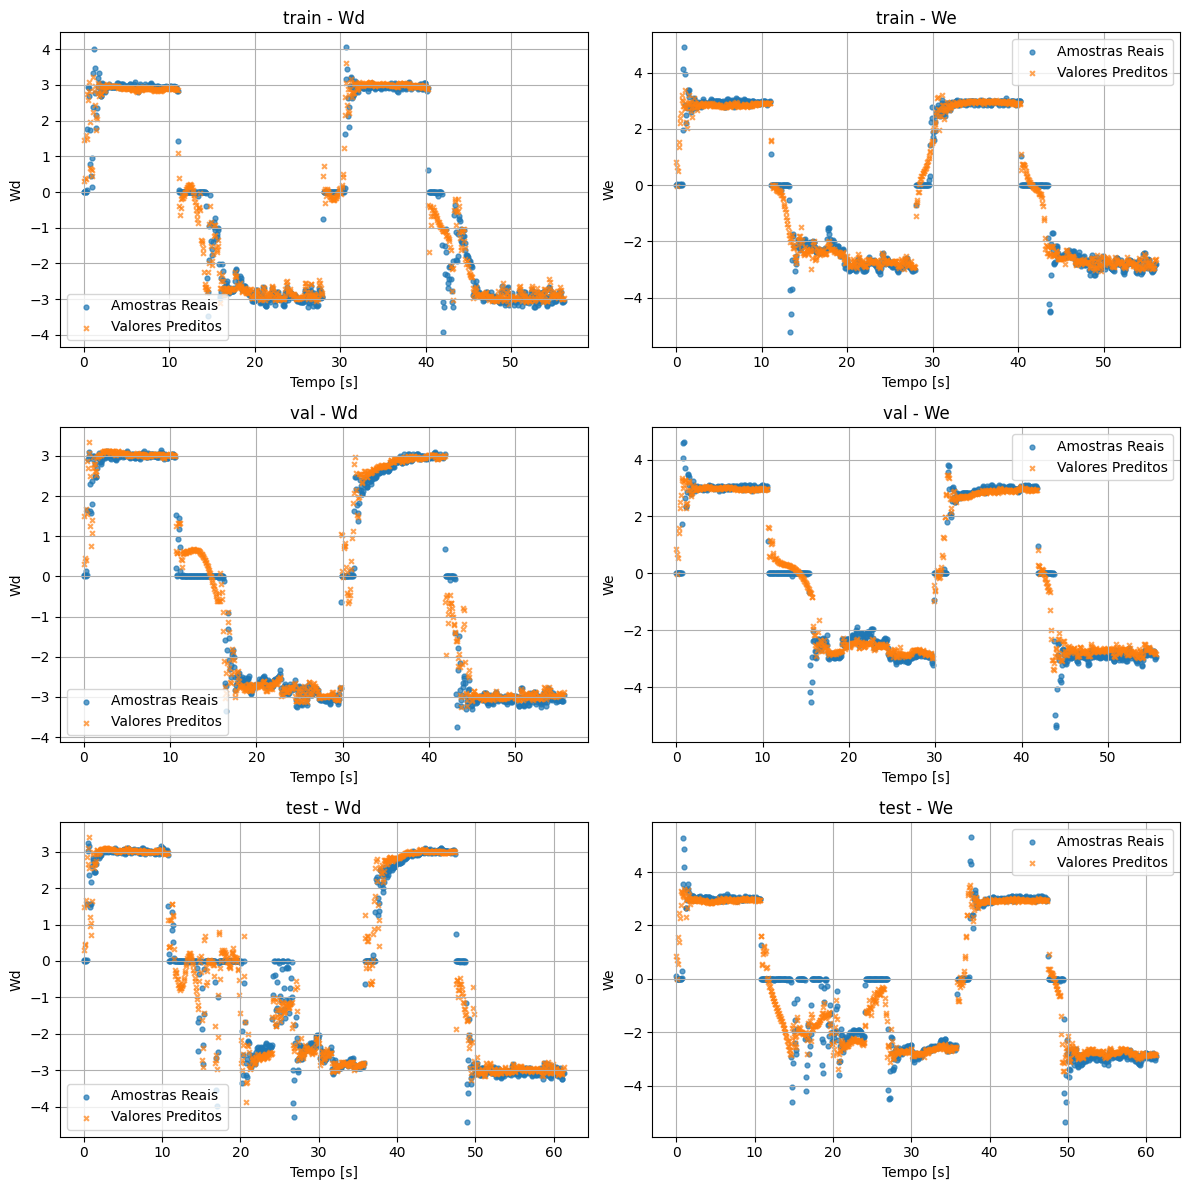

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Wd | train -> R² = 0.9736, MSE = 1.7710e-01
We | train -> R² = 0.9663, MSE = 2.2480e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | val -> R² = 0.9763, MSE = 1.6245e-01
We | val -> R² = 0.9542, MSE = 3.2056e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | test -> R² = 0.9609, MSE = 2.4129e-01
We | test -> R² = 0.8947, MSE = 6.6602e-01


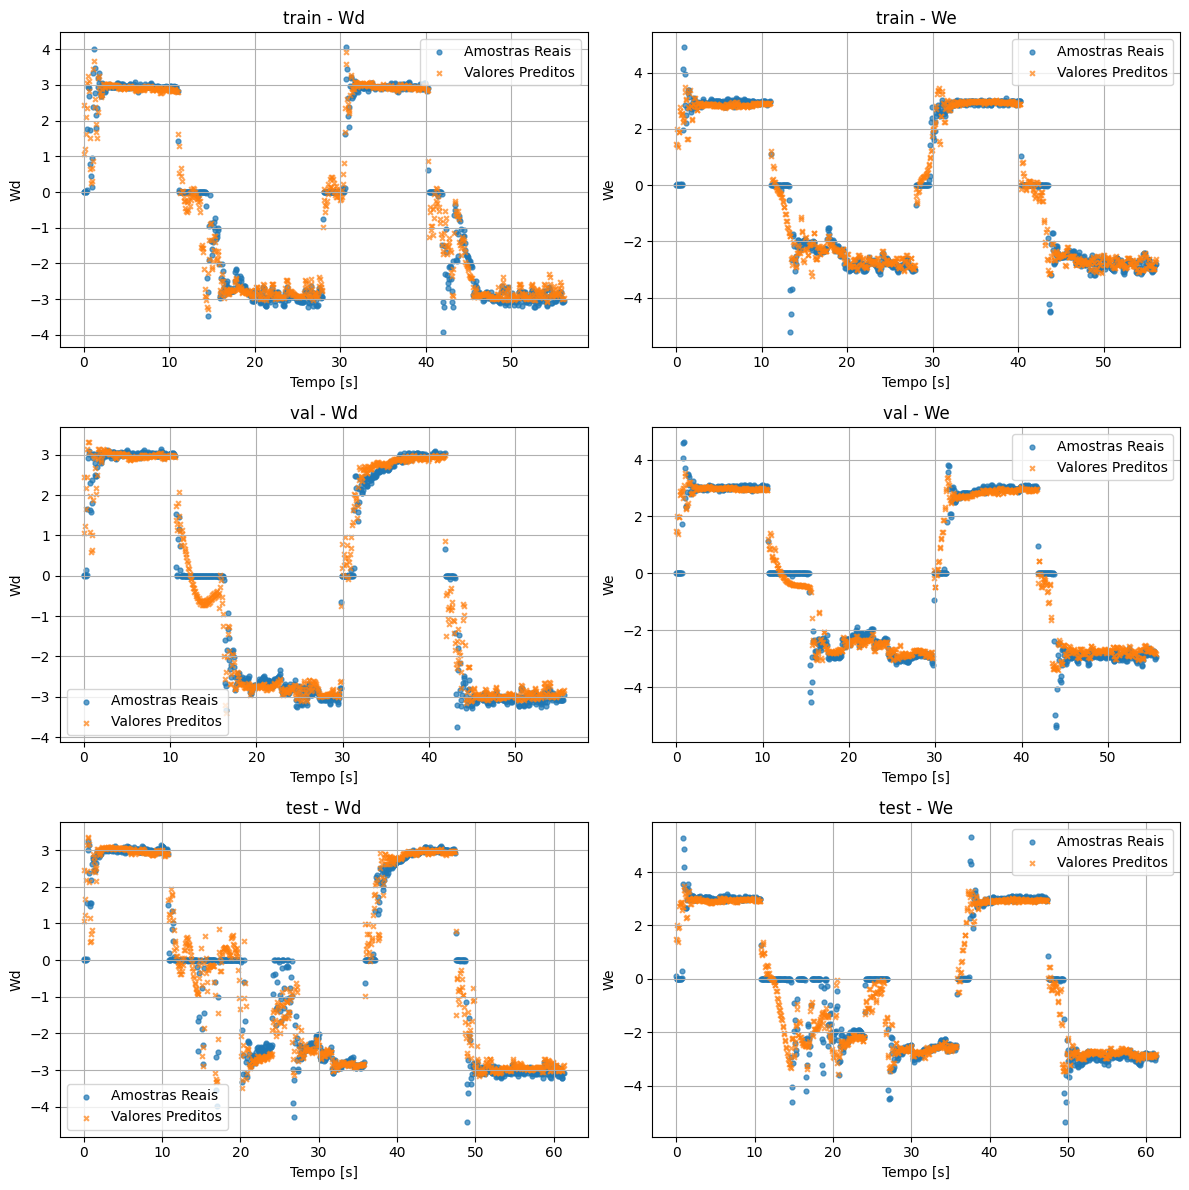

✅ Resultados exportados para resultados.xlsx
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wd | train -> R² = 0.9758, MSE = 1.6266e-01
We | train -> R² = 0.9645, MSE = 2.3660e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | val -> R² = 0.9846, MSE = 1.0598e-01
We | val -> R² = 0.9599, MSE = 2.8102e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wd | test -> R² = 0.9728, MSE = 1.6813e-01
We | test -> R² = 0.9229, MSE = 4.8729e-01


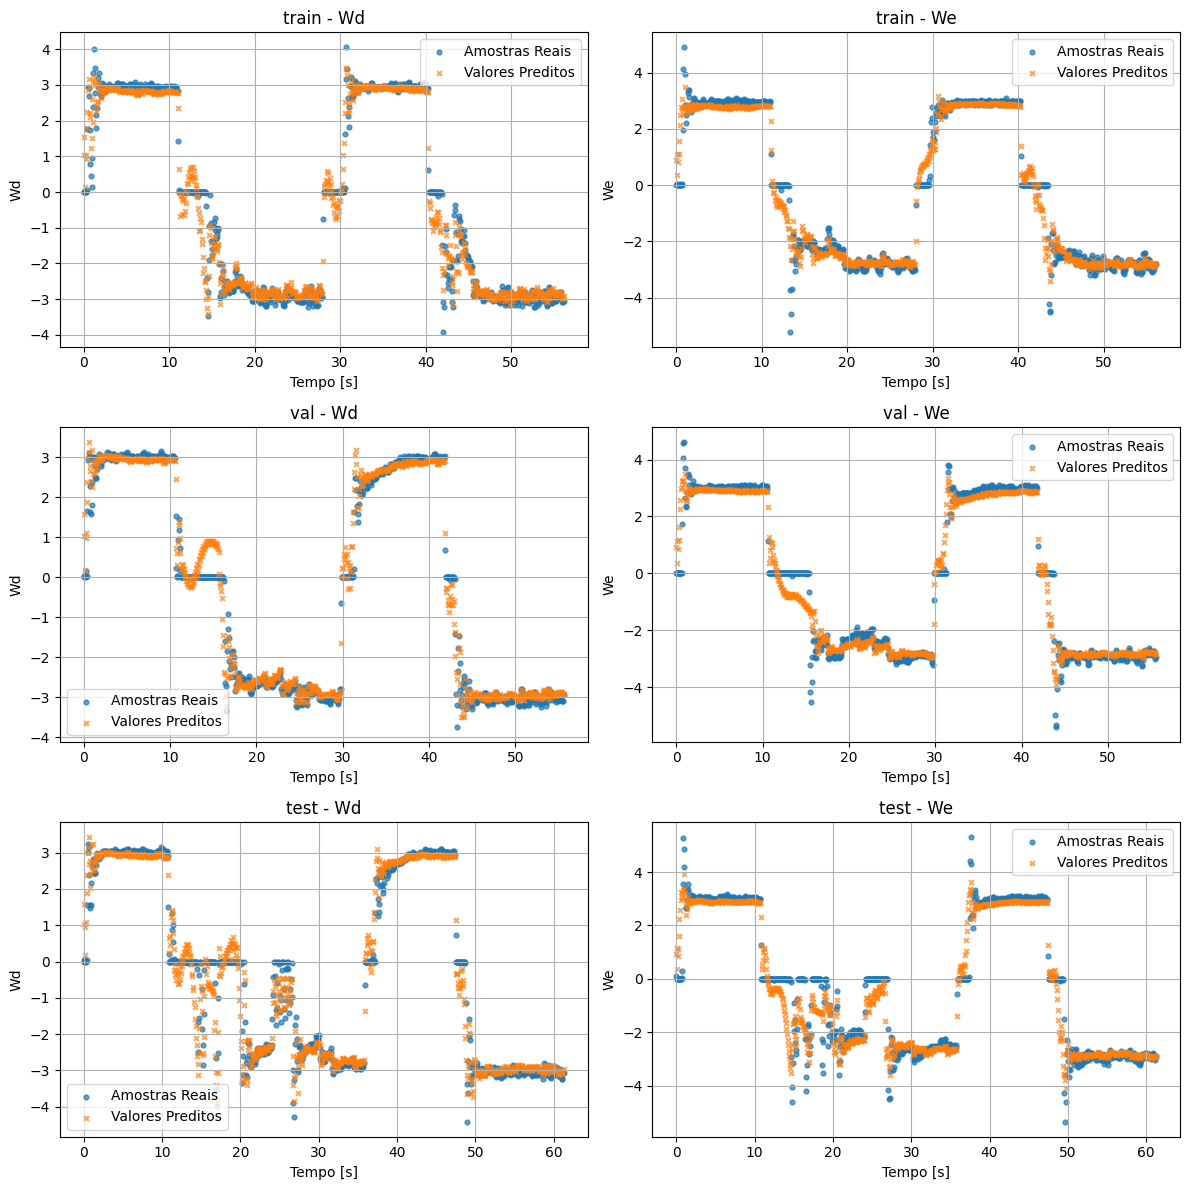

✅ Resultados exportados para resultados.xlsx


KeyboardInterrupt: 

In [7]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import initializers

# tamanho da entrada
INPUT_SIZE = len(PREDICTORS)  
OUTPUT_SIZE = len(TARGET) 
N_MODELS = 7  # número de inicializações

seeds = np.random.choice(range(1, 10000), size=N_MODELS, replace=False)
neurons = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18]
results = {}

for n in neurons:
    for i, s in enumerate(seeds):

        initializer = initializers.RandomNormal(seed=int(s))

        # cria modelo
        model = keras.models.Sequential([
            keras.layers.Input(shape=(TIME_STEPS, INPUT_SIZE)),
            keras.layers.SimpleRNN(n, activation="tanh"),
            keras.layers.Dense(OUTPUT_SIZE, activation="linear"),  
        ])
        
        # salva pesos iniciais
        w0 = model.get_weights()

        # compila
        model.compile(loss="mean_squared_error", optimizer="adam")
        early_stopping_monitor = EarlyStopping(
            monitor='val_loss',
            patience=50,
            restore_best_weights=True
        )

        # treina
        history = model.fit(
            x_train, 
            y_train, 
            epochs=500,
            callbacks=[early_stopping_monitor],
            validation_data=(x_val, y_val),
            verbose=0
        )

        # salva pesos finais
        wf = model.get_weights()

       # avalia o modelo
        metrics = EvalModel(model)


        results[f"model_{i}"] = {
            "Neurons": n,
            "Seed": s,
            "W0": w0,
            "Wf": wf,

            # ---- Saída Wd ----
            "R2_Train_Wd": metrics["Wd"]["R2_train"],
            "MSE_Train_Wd": metrics["Wd"]["MSE_train"],
            "R2_Val_Wd": metrics["Wd"]["R2_val"],
            "MSE_Val_Wd": metrics["Wd"]["MSE_val"],
            "R2_Test_Wd": metrics["Wd"]["R2_test"],
            "MSE_Test_Wd": metrics["Wd"]["MSE_test"],

            # ---- Saída We ----
            "R2_Train_We": metrics["We"]["R2_train"],
            "MSE_Train_We": metrics["We"]["MSE_train"],
            "R2_Val_We": metrics["We"]["R2_val"],
            "MSE_Val_We": metrics["We"]["MSE_val"],
            "R2_Test_We": metrics["We"]["R2_test"],
            "MSE_Test_We": metrics["We"]["MSE_test"],
        }
        records = []
        for name, info in results.items():
            row = {
                "Model": name,
                "Neurons": info["Neurons"],
                "Seed": info["Seed"],

                # ---- Métricas Wd ----
                "R2_Train_Wd": info["R2_Train_Wd"],
                "MSE_Train_Wd": info["MSE_Train_Wd"],
                "R2_Val_Wd": info["R2_Val_Wd"],
                "MSE_Val_Wd": info["MSE_Val_Wd"],
                "R2_Test_Wd": info["R2_Test_Wd"],
                "MSE_Test_Wd": info["MSE_Test_Wd"],

                # ---- Métricas We ----
                "R2_Train_We": info["R2_Train_We"],
                "MSE_Train_We": info["MSE_Train_We"],
                "R2_Val_We": info["R2_Val_We"],
                "MSE_Val_We": info["MSE_Val_We"],
                "R2_Test_We": info["R2_Test_We"],
                "MSE_Test_We": info["MSE_Test_We"],

                # ---- Pesos ----
                "W0": str([w.round(4).tolist() for w in info["W0"]]),
                "Wf": str([w.round(4).tolist() for w in info["Wf"]]),
            }
            records.append(row)

        # cria DataFrame e exporta
        df = pd.DataFrame(records)
        df.to_excel("resultados.xlsx", index=False)
        print("✅ Resultados exportados para resultados.xlsx")

In [ ]:
records

[]